In [813]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statistics as stat
import time
start_time = time.time()
import pandas as pd
import numpy as np
import random as rd
import matplotlib.pyplot as plt
from random import choices

In [814]:
data = pd.read_csv(f"PCA_comp1.csv", header = None)
# 0: 'Sepal Length' , 1: 'Sepal Width', 2: 'Petal Length', 3: 'Petal Width'
data1 = data.copy()

In [815]:
m = np.mean(data1, axis=0)
for i in range(np.shape(data1)[1]):
    data1[i] -= m[i]
    
data1
#m


,0,1,2,3
0,-0.743333,0.446,-2.358667,-0.998667
1,-0.943333,-0.054,-2.358667,-0.998667
2,-1.143333,0.146,-2.458667,-0.998667
3,-1.243333,0.046,-2.258667,-0.998667
4,-0.843333,0.546,-2.358667,-0.998667
...,...,...,...,...
145,0.856667,-0.054,1.441333,1.101333
146,0.456667,-0.554,1.241333,0.701333
147,0.656667,-0.054,1.441333,0.801333
148,0.356667,0.346,1.641333,1.101333


In [816]:
def PCA(X):
    XXT = np.dot(X,X.T)
    n = np.shape(X)[1]
    cov = XXT/(n-1)
    eig_val, eig_vect = np.linalg.eig(cov)
    index_arr = np.argsort(eig_val)[::-1]
    var = eig_val[index_arr]
    eig_vect = eig_vect[index_arr]     
    return var, eig_vect, index_arr

In [817]:
var, eig_vect, index_arr = PCA(data1.T) 

In [818]:
var

array([4.22484077, 0.24224357, 0.07852391, 0.02368303])

In [819]:
eig_vect

array([[ 0.36158968, -0.65653988, -0.58099728,  0.31725455],
       [-0.08226889, -0.72971237,  0.59641809, -0.32409435],
       [ 0.85657211,  0.1757674 ,  0.07252408, -0.47971899],
       [ 0.35884393,  0.07470647,  0.54906091,  0.75112056]])

In [820]:
var_prop = (var/np.sum(var))*100
var_prop

array([92.46162072,  5.30155679,  1.71851395,  0.51830855])

In [821]:
#Projection of data
data1_ = data1.dot(eig_vect[:,:2])
data1_

,0,1
0,-2.684207,-0.326607
1,-2.715391,0.169557
2,-2.889820,0.137346
3,-2.746437,0.311124
4,-2.728593,-0.333925
...,...,...
145,1.944017,-0.187415
146,1.525664,0.375021
147,1.764046,-0.078519
148,1.901629,-0.115877


Text(0, 0.5, 'PC2')

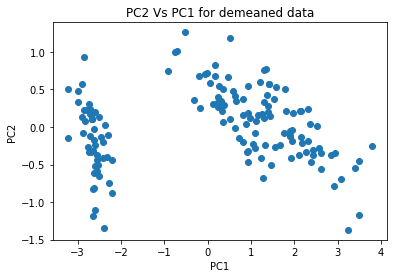

In [822]:
plt.scatter(data1_[0],data1_[1])
plt.title("PC2 Vs PC1 for demeaned data")
plt.xlabel("PC1")
plt.ylabel("PC2")

In [823]:
data3 = data
n_ = np.shape(data3)[1]
sd = np.zeros(n_)
m = np.mean(data3, axis=0)
for i in range(n_):
    sd[i] = stat.stdev(data[i])
    data3[i] = (data3[i]-m[i])/sd[i]

data3

,0,1,2,3
0,-0.897674,1.028611,-1.336794,-1.308593
1,-1.139200,-0.124540,-1.336794,-1.308593
2,-1.380727,0.336720,-1.393470,-1.308593
3,-1.501490,0.106090,-1.280118,-1.308593
4,-1.018437,1.259242,-1.336794,-1.308593
...,...,...,...,...
145,1.034539,-0.124540,0.816888,1.443121
146,0.551486,-1.277692,0.703536,0.918985
147,0.793012,-0.124540,0.816888,1.050019
148,0.430722,0.797981,0.930239,1.443121


In [824]:
var1, eig_vect1, index_arr1 = PCA(data3.T)

In [825]:
var1

array([2.91081808, 0.92122093, 0.14735328, 0.02060771])

In [826]:
eig_vect1

array([[ 0.52237162, -0.37231836, -0.72101681,  0.26199559],
       [-0.26335492, -0.92555649,  0.24203288, -0.12413481],
       [ 0.58125401, -0.02109478,  0.14089226, -0.80115427],
       [ 0.56561105, -0.06541577,  0.6338014 ,  0.52354627]])

In [827]:
var_prop1 = (var1/np.sum(var1))*100
var_prop1

array([72.77045209, 23.03052327,  3.68383196,  0.51519268])

In [828]:
data3_ = data3.dot(eig_vect1[:,:2])
data3_

,0,1
0,-2.256981,-0.504015
1,-2.079459,0.653216
2,-2.360044,0.317414
3,-2.296504,0.573447
4,-2.380802,-0.672514
...,...,...
145,1.864277,-0.381544
146,1.553288,0.902291
147,1.515767,-0.265904
148,1.371796,-1.012968


Text(0, 0.5, 'PC2')

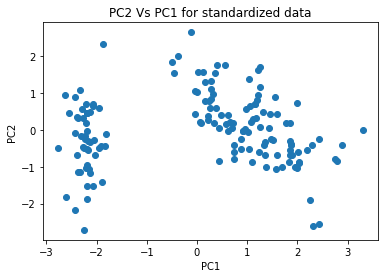

In [829]:
plt.scatter(data3_[0],data3_[1])
plt.title("PC2 Vs PC1 for standardized data")
plt.xlabel("PC1")
plt.ylabel("PC2")

In [830]:
def Dsq_init(df,k,centroid):
    while centroid.shape[0]<k:
        min_dist = euclid_dist(df,centroid)
        prob = list()
        for i in range(df.shape[0]):
            prob.append((min_dist[i]**2)/np.sum(min_dist**2))
        #df["prob"] = prob
        id = choices(df.index.values.tolist(),prob)
        centroid = centroid.append(df.iloc[id,:])
    
    return centroid

In [831]:
def euclid_dist(df1,df2):
    dist_mat = np.zeros(shape = (df1.shape[0],df2.shape[0]))
    for id1,row1 in df1.iterrows():
        j = 0
        for id2,row2 in df2.iterrows():
            a = [row1["X"]-row2["X"],row1["Y"]-row2["Y"]]
            dist_mat[id1][j] =  np.linalg.norm(a)
            j += 1
    min_dist = dist_mat.min(axis=1)
    return min_dist

In [832]:
def k_means_fit(X, centroids, n):
    # get a copy of the original data
    X_data = X

    diff = 1
    j = 0
    No_iter = 0

    while(diff != 0):

        # creating a copy of the original dataframe
        i = 1

        # iterate over each centroid point
        for index1, row_c in centroids.iterrows():
            ED = []

            # iterate over each data point
            for index2, row_d in X_data.iterrows():

                # calculate distance between current point and centroid
                d1 = (row_c["X"]-row_d["X"])**2
                d2 = (row_c["Y"]-row_d["Y"])**2
                d = np.sqrt(d1+d2)

                # append distance in a list 'ED'
                ED.append(d)

            # append distace for a centroid in original data frame
            X[i] = ED
            i = i+1

        C = []
        for index, row in X.iterrows():

            # get distance from centroid of current data point
            min_dist = row[1]
            pos = 1

            # loop to locate the closest centroid to current point
            for i in range(n):

                # if current distance is greater than that of other centroids
                if row[i+1] < min_dist:

                    # the smaller distanc becomes the minimum distance
                    min_dist = row[i+1]
                    pos = i+1
            C.append(pos)

        # assigning the closest cluster to each data point
        X["Cluster"] = C

        # grouping each cluster by their mean value to create new centroids
        centroids_new = X.groupby(["Cluster"]).mean()[["Y", "X"]]
        if j == 0:
            diff = 1
            j = j+1

        else:
            # check if there is a difference between old and new centroids
            diff = (centroids_new['Y'] - centroids['Y']).sum() + \
                (centroids_new['X'] - centroids['X']).sum()
            No_iter += 1
            # print(diff.sum())

        centroids = X.groupby(["Cluster"]).mean()[["Y", "X"]]

    return X, centroids, No_iter



In [833]:
def k_means(data, k):
    # k = int(input("No, of Clusters: "))
    centroids = data.sample(k)
    clustered, cent, No_iter1 = k_means_fit(data, centroids, k)
    cost = np.sum(euclid_dist(data, cent))

    return cost, No_iter1

In [834]:
def k_means_plot(data, centroids, k, f):
    # k = int(input("No, of Clusters: "))
    clustered, cent, No_iter1 = k_means_fit(data, centroids, k)

    axarr = f.add_subplot(1,1,1) # here is where you add the subplot to f

    color = ['y', 'blue', 'green', 'cyan', 'black', 'brown']
    
    # plot data
    for k in range(len(color)):
        cluster = clustered[clustered["Cluster"] == k+1]
        plt.scatter(cluster["X"], cluster["Y"], c=color[k])

    # plot centroids
    plt.scatter(cent["X"], cent["Y"], c='r')
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.title("k-means clustering for Standardized Iris Dataset after performing PCA")
    plt.show()
    cost = np.sum(euclid_dist(data, cent))
    return cost, No_iter1, f

In [835]:
def k_means_Dsq(data, k):
    #k = int(input("No, of Clusters: "))
    centroids = Dsq_init(data, k)
    clustered, cent, No_iter2 = k_means_fit(data, centroids, k)
    cost = np.sum(euclid_dist(data, cent))

    return cost, No_iter2

In [836]:
def k_means_Dsq_plot(data, centroids, k, f):
    #k = int(input("No, of Clusters: "))
    clustered, cent, No_iter2 = k_means_fit(data, centroids, k)
    
    axarr = f.add_subplot(1,1,1) # here is where you add the subplot to f

    color = ['y', 'blue', 'green', 'cyan', 'black', 'brown']
    # plot data
    for k in range(len(color)):
        cluster = clustered[clustered["Cluster"] == k+1]
        plt.scatter(cluster["X"], cluster["Y"], c=color[k])

    # plot centroids
    plt.scatter(cent["X"], cent["Y"], c='r')
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.title("k-means++ clustering for Standardized Iris Dataset after performing PCA")
    plt.show()
    cost = np.sum(euclid_dist(data, cent))
    return cost, No_iter2,f

In [837]:
data3_.rename(columns = {0: "X", 1: "Y"},inplace = True)

In [838]:
# centroids1 = data3_.sample(3)
# plt.scatter(data3_['X'],data3_['Y'])
# plt.scatter(centroids1['X'],centroids1['Y'],c='black')
# plt.title("Iris data k-means Initial Centers")
# plt.xlabel("PC1")
# plt.ylabel("PC2")

In [839]:
# k_means_plot(data3_, centroids1, 3)

In [840]:
# centroids2 = Dsq_init(data3_, 3)
# plt.scatter(data3_['X'],data3_['Y'])
# plt.scatter(centroids2['X'],centroids2['Y'],c='black')
# plt.title("Iris data k-means++ Seeding")
# plt.xlabel("PC1")
# plt.ylabel("PC2")

In [841]:
# f = plt.figure(figsize=(7,5))
# a, b, c = k_means_Dsq_plot(data3_,centroids2,3,f)

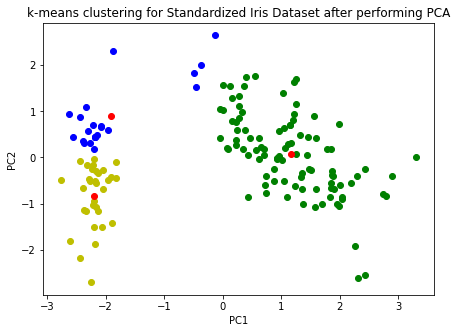

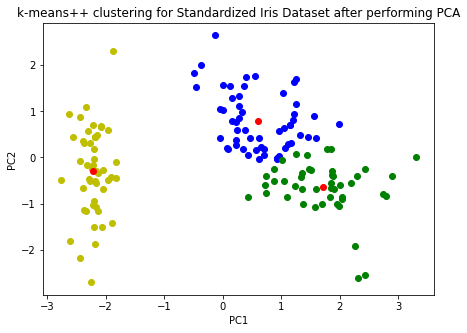

134.38057862152613 	 0.5472636222839355 	 112.52894972798143 	 1.062596082687378
K means:4		K means ++ : 7


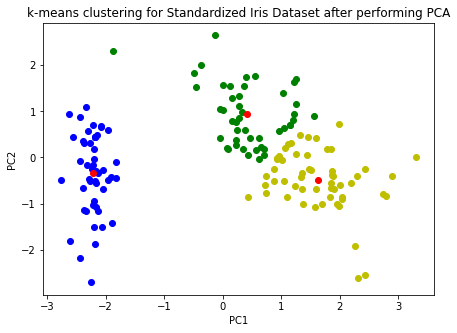

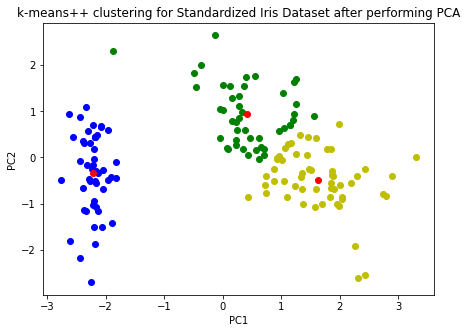

113.12338455405968 	 0.57521653175354 	 113.12338455405968 	 0.8308925628662109
K means:3		K means ++ : 3


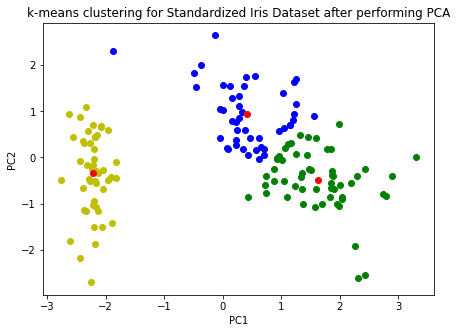

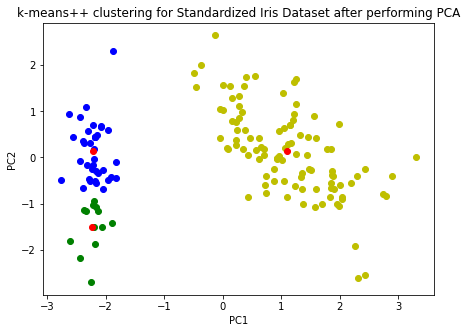

113.12338455405968 	 0.8109135627746582 	 132.9321470284424 	 0.8228898048400879
K means:8		K means ++ : 3


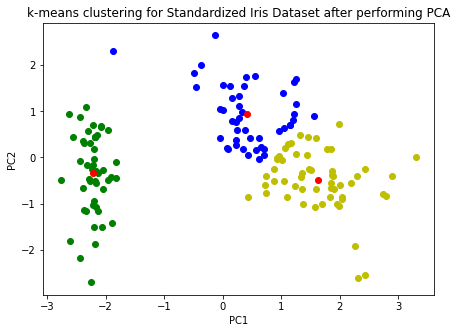

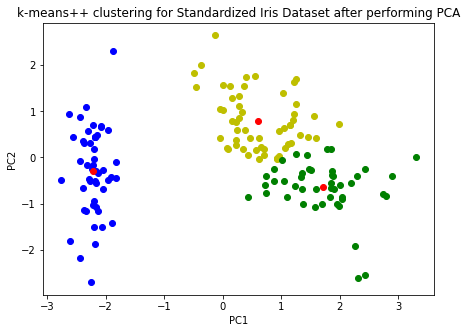

113.12338455405968 	 0.6032111644744873 	 112.52894972798143 	 1.6577529907226562
K means:4		K means ++ : 8


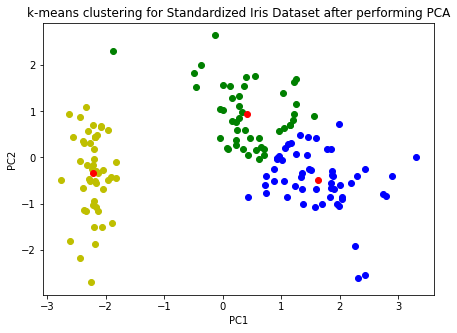

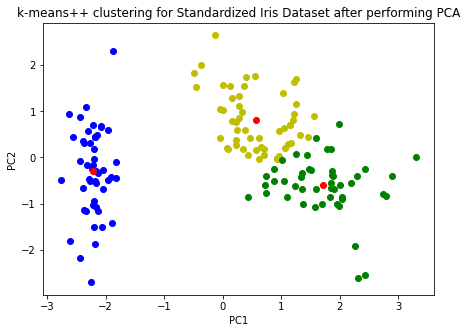

113.12338455405968 	 0.7749950885772705 	 112.35689973760635 	 0.8068900108337402
K means:4		K means ++ : 5


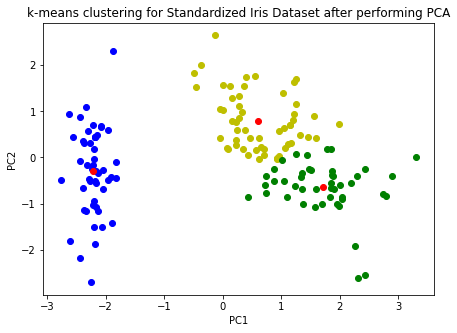

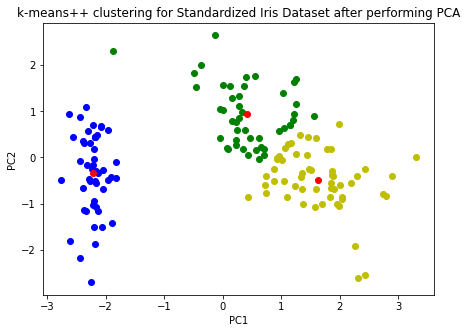

112.52894972798143 	 0.8029561042785645 	 113.12338455405968 	 0.7949130535125732
K means:8		K means ++ : 4


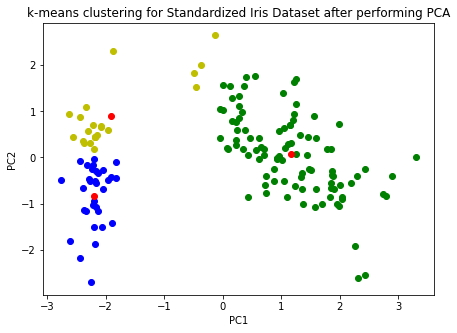

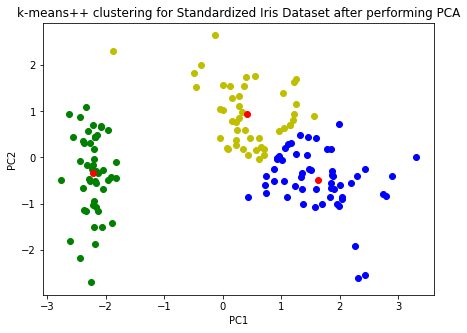

134.38057862152613 	 1.4261314868927002 	 113.12338455405968 	 1.5499179363250732
K means:6		K means ++ : 8


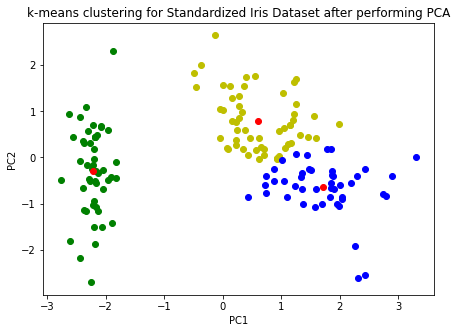

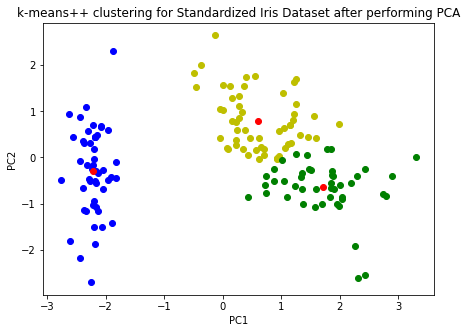

112.52894972798143 	 0.6871089935302734 	 112.52894972798143 	 0.6870818138122559
K means:5		K means ++ : 2


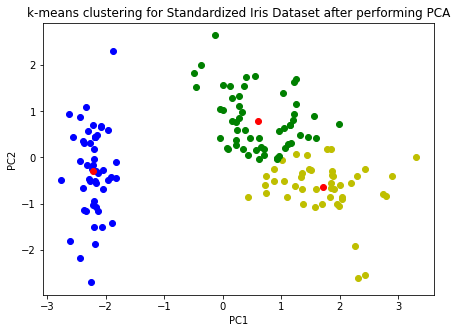

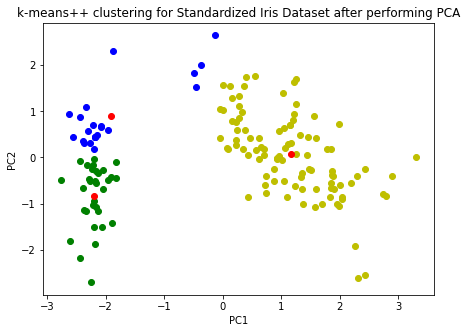

112.52894972798143 	 1.3182399272918701 	 134.38057862152613 	 0.9107820987701416
K means:10		K means ++ : 6


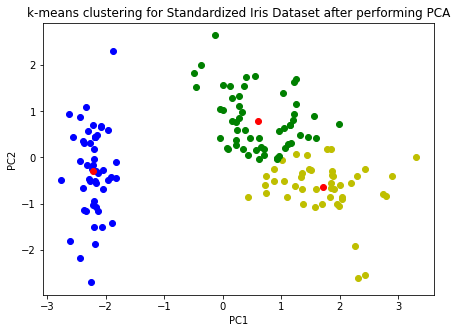

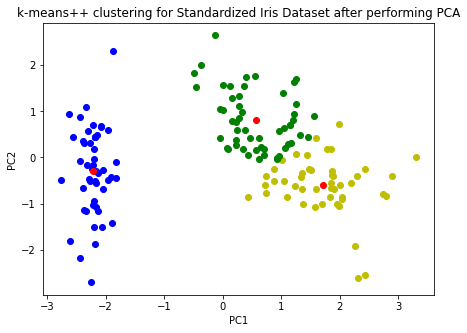

112.52894972798143 	 0.9547398090362549 	 112.35689973760635 	 1.330183744430542
K means:7		K means ++ : 5


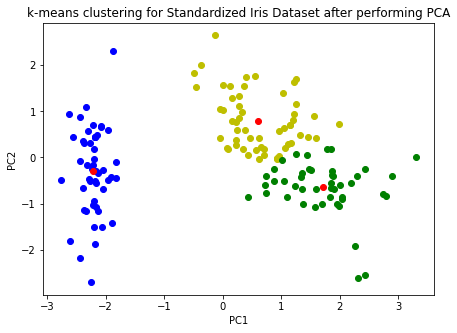

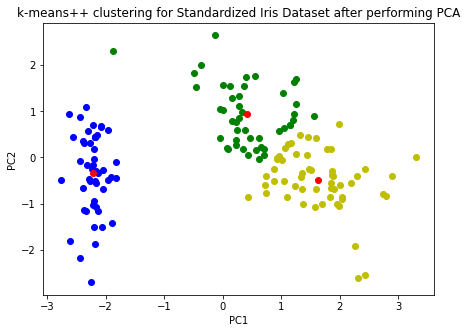

112.52894972798143 	 1.1145577430725098 	 113.12338455405968 	 1.469987154006958
K means:7		K means ++ : 5


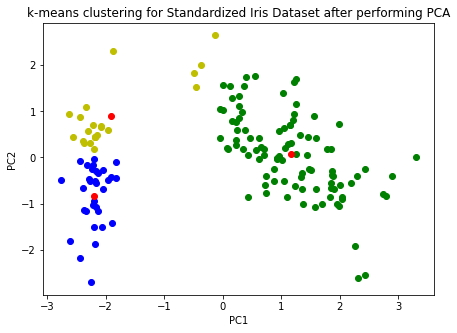

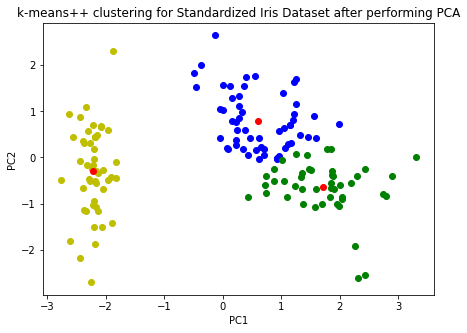

134.38057862152613 	 0.9507756233215332 	 112.52894972798143 	 1.0545740127563477
K means:3		K means ++ : 6


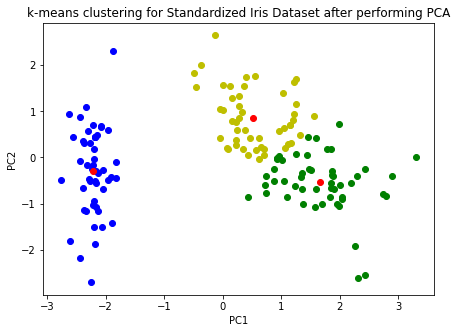

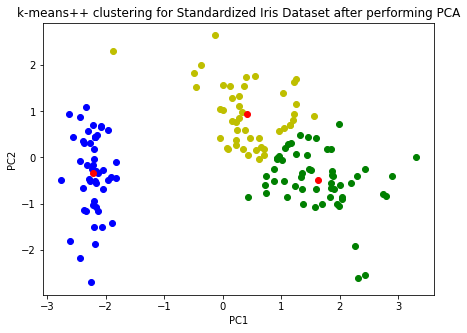

112.6098764524865 	 0.6910512447357178 	 113.12338455405968 	 0.9467329978942871
K means:4		K means ++ : 4


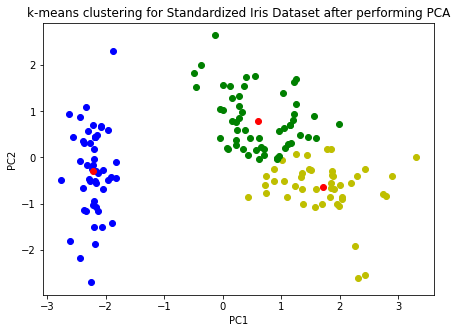

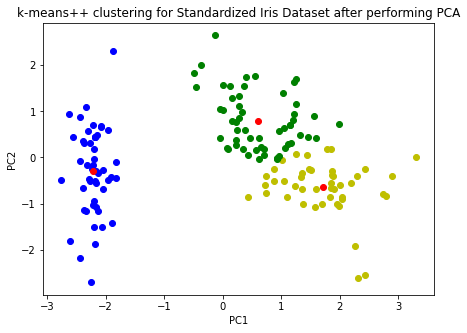

112.52894972798143 	 0.8868448734283447 	 112.52894972798143 	 0.9147465229034424
K means:7		K means ++ : 5


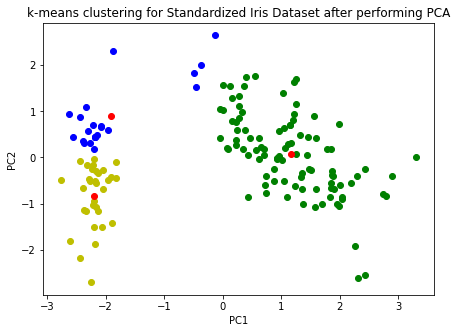

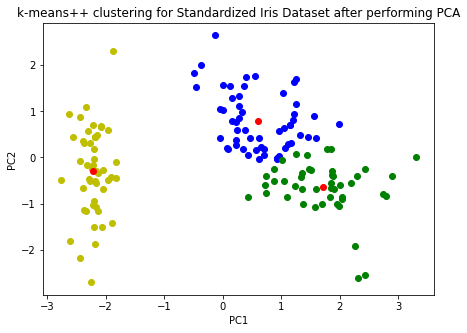

134.38057862152613 	 0.8868474960327148 	 112.52894972798143 	 1.7257027626037598
K means:3		K means ++ : 10


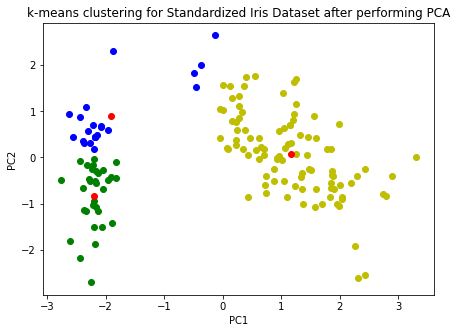

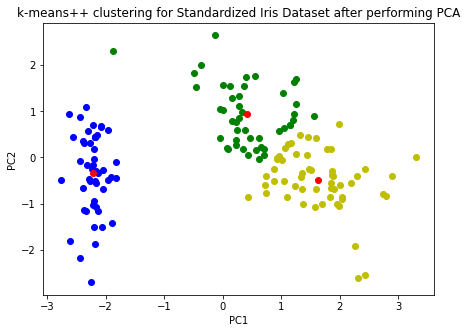

134.38057862152613 	 0.5432634353637695 	 113.12338455405968 	 1.2183520793914795
K means:3		K means ++ : 7


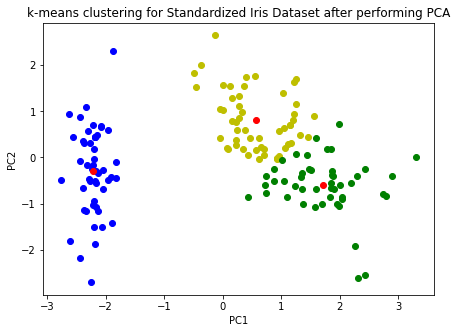

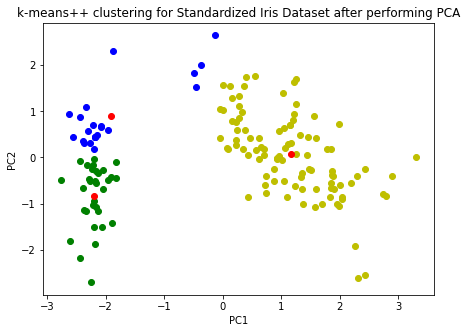

112.35689973760635 	 1.1504950523376465 	 134.38057862152613 	 0.9067776203155518
K means:5		K means ++ : 6


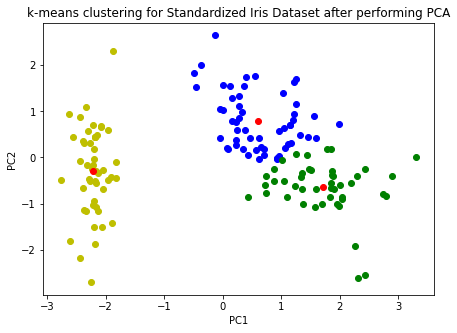

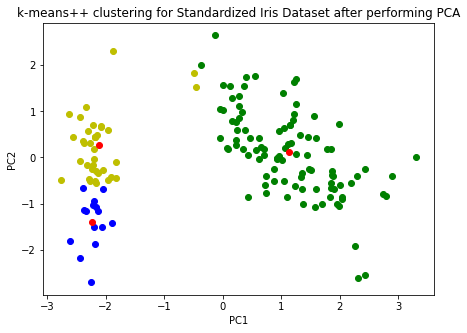

112.52894972798143 	 0.6830873489379883 	 133.22453996764477 	 0.6511311531066895
K means:7		K means ++ : 2


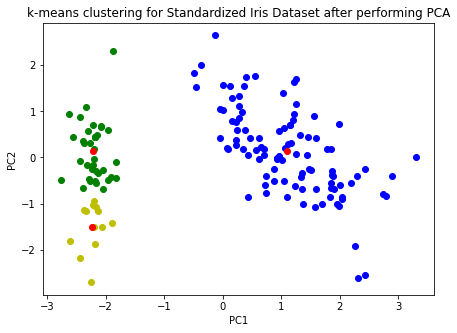

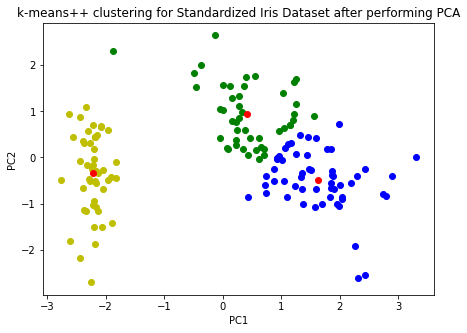

132.9321470284424 	 0.6830360889434814 	 113.12338455405968 	 1.0865581035614014
K means:1		K means ++ : 7


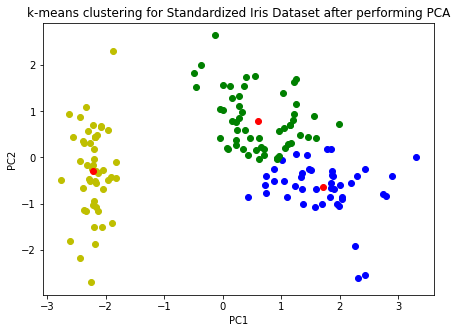

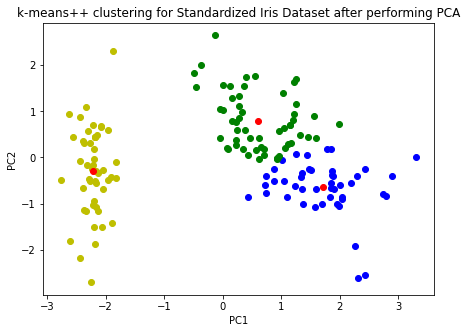

112.52894972798143 	 1.0026445388793945 	 112.52894972798143 	 1.5139901638031006
K means:8		K means ++ : 7


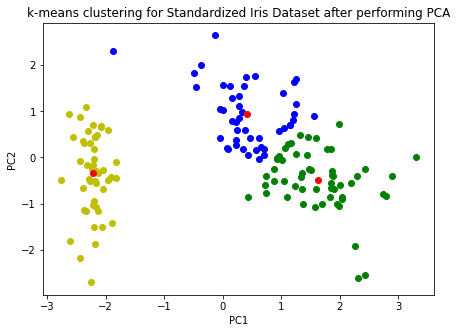

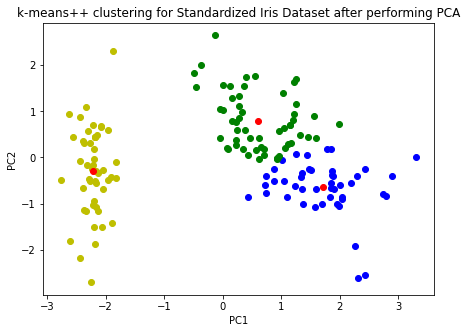

113.12338455405968 	 1.1744167804718018 	 112.52894972798143 	 0.7749691009521484
K means:6		K means ++ : 5


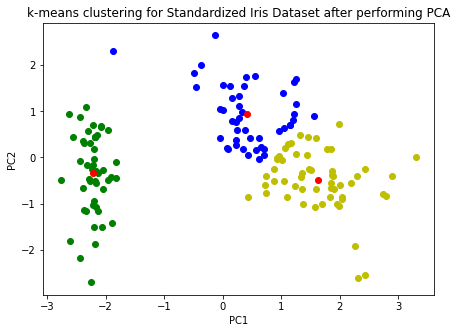

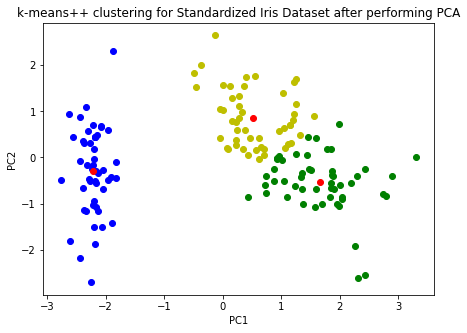

113.12338455405968 	 0.7749338150024414 	 112.6098764524865 	 0.6071884632110596
K means:6		K means ++ : 4


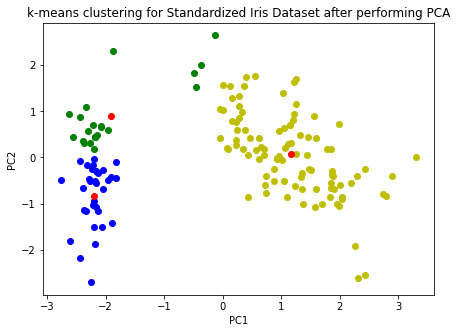

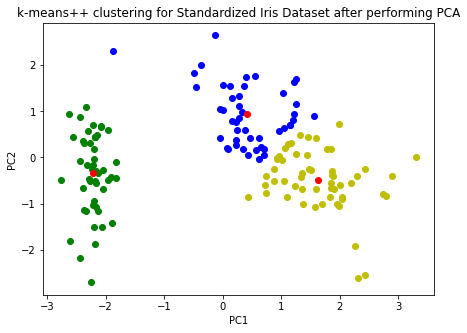

134.38057862152613 	 0.6871180534362793 	 113.12338455405968 	 0.9706931114196777
K means:4		K means ++ : 6


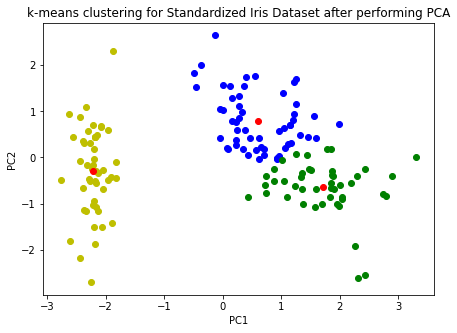

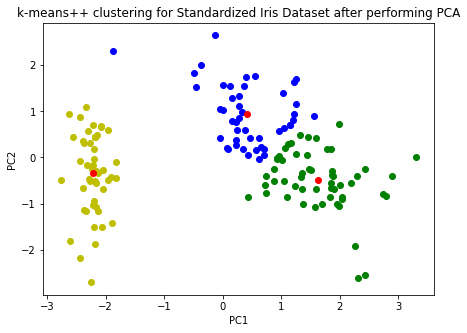

112.52894972798143 	 0.8228991031646729 	 113.12338455405968 	 0.8229539394378662
K means:8		K means ++ : 5


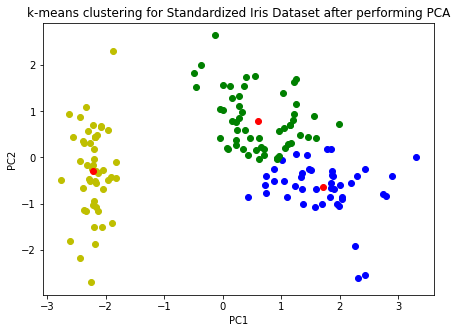

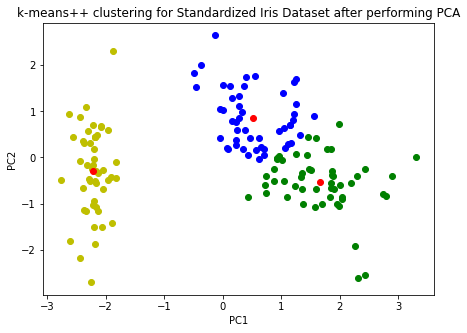

112.52894972798143 	 0.5632479190826416 	 112.6098764524865 	 1.2064323425292969
K means:3		K means ++ : 4


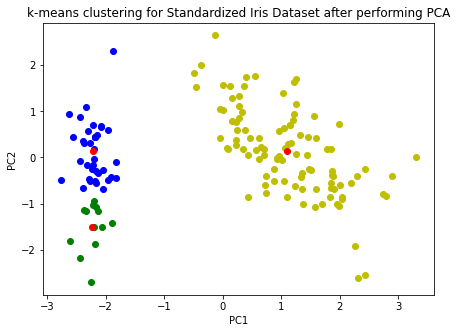

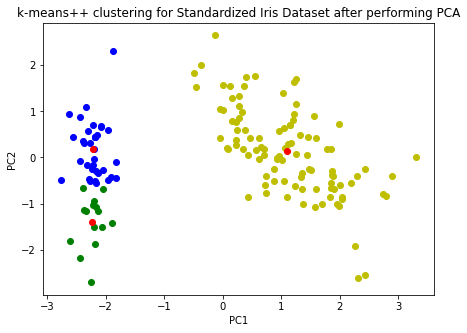

132.9321470284424 	 0.5951728820800781 	 132.5773429112728 	 0.6990883350372314
K means:2		K means ++ : 1


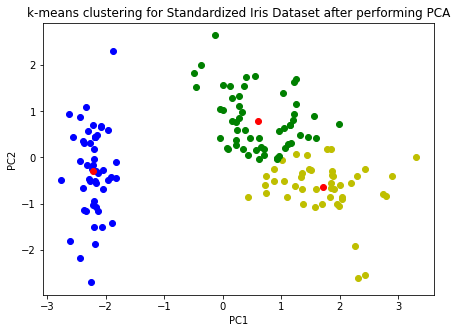

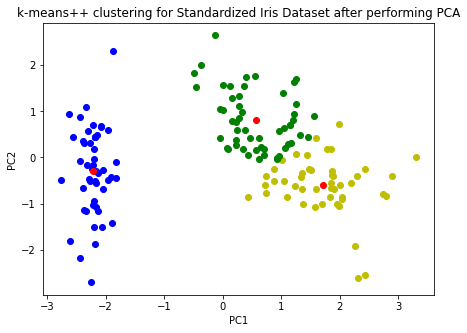

112.52894972798143 	 0.7190649509429932 	 112.35689973760635 	 0.7549920082092285
K means:6		K means ++ : 5


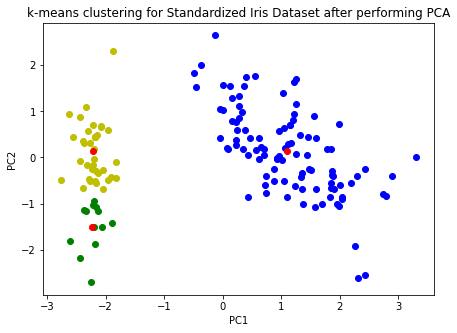

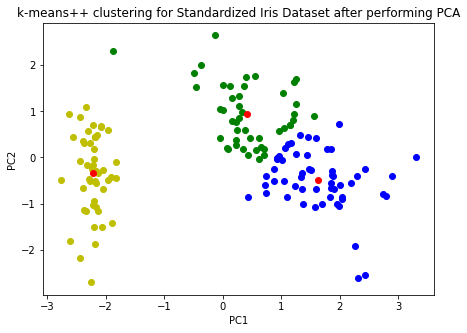

132.9321470284424 	 0.44740819931030273 	 113.12338455405968 	 1.454026460647583
K means:2		K means ++ : 5


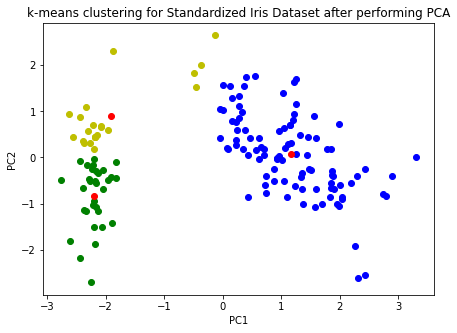

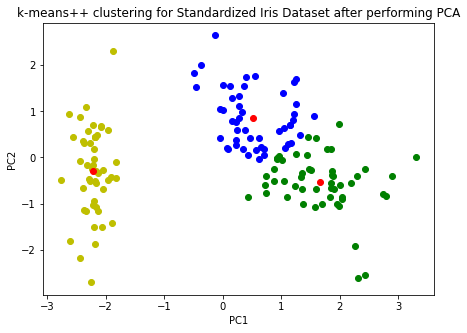

134.38057862152613 	 0.99466872215271 	 112.6098764524865 	 0.9308063983917236
K means:6		K means ++ : 4


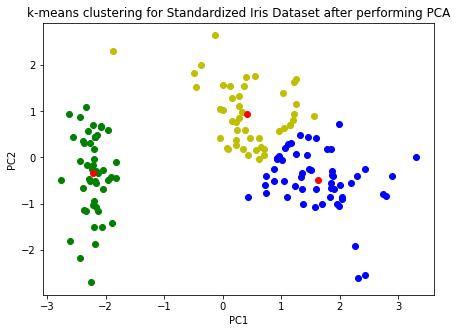

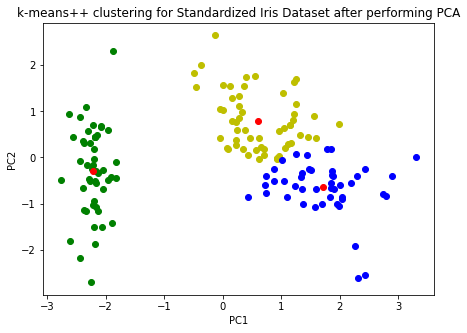

113.12338455405968 	 1.062563419342041 	 112.52894972798143 	 1.046605110168457
K means:5		K means ++ : 7


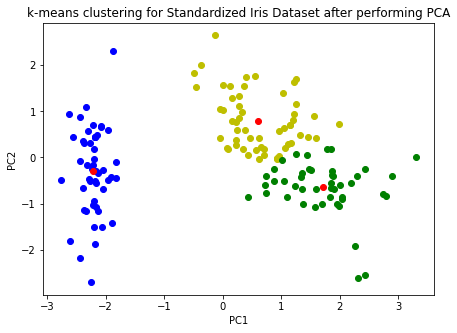

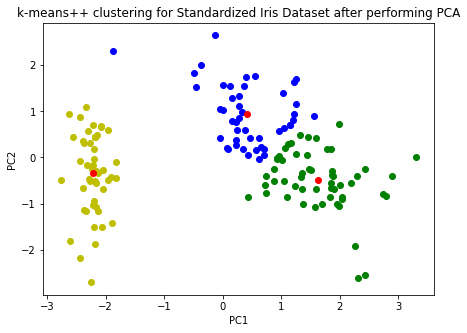

112.52894972798143 	 1.2742657661437988 	 113.12338455405968 	 0.970705509185791
K means:12		K means ++ : 5


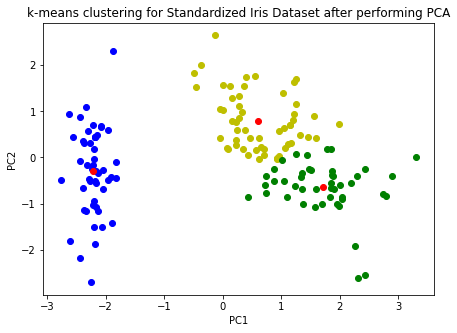

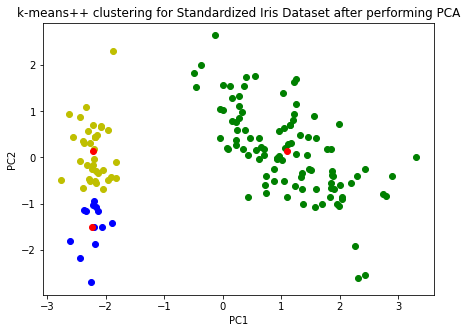

112.52894972798143 	 1.3062779903411865 	 132.9321470284424 	 0.8548798561096191
K means:10		K means ++ : 2


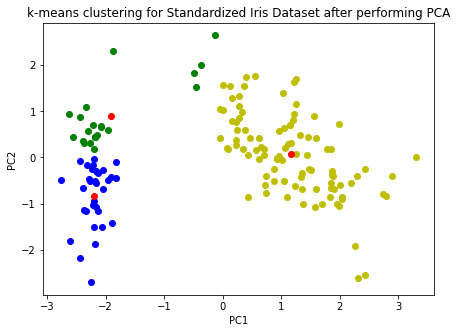

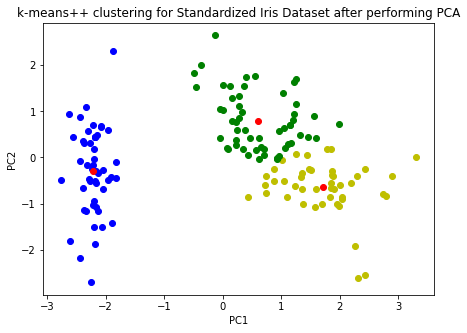

134.38057862152613 	 0.9746494293212891 	 112.52894972798143 	 0.7789583206176758
K means:9		K means ++ : 6


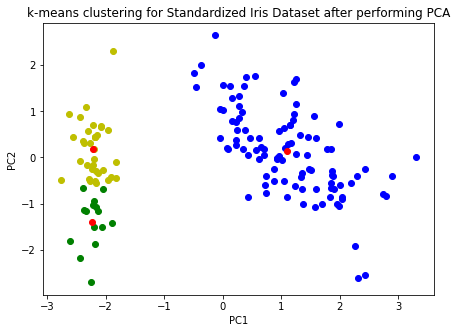

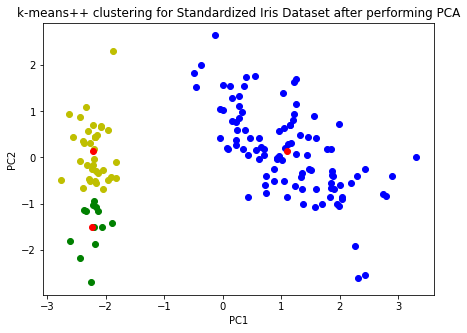

132.5773429112728 	 0.4953489303588867 	 132.9321470284424 	 0.9986870288848877
K means:2		K means ++ : 3


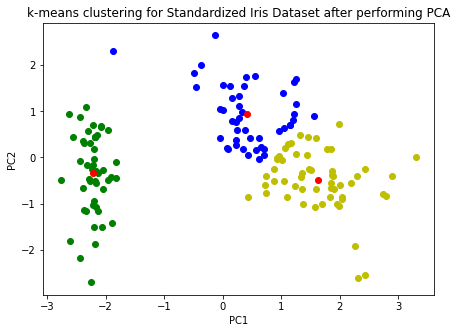

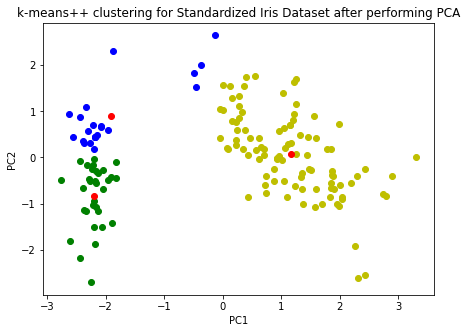

113.12338455405968 	 1.9813246726989746 	 134.38057862152613 	 0.9267866611480713
K means:7		K means ++ : 4


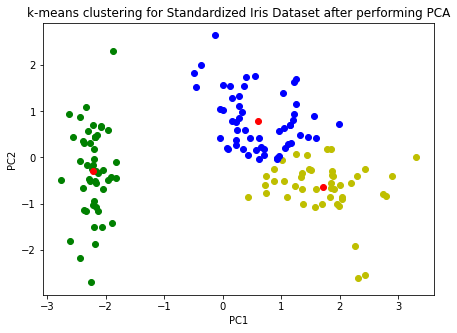

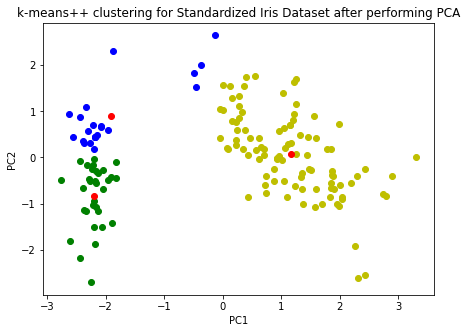

112.52894972798143 	 0.45539140701293945 	 134.38057862152613 	 0.8988001346588135
K means:1		K means ++ : 9


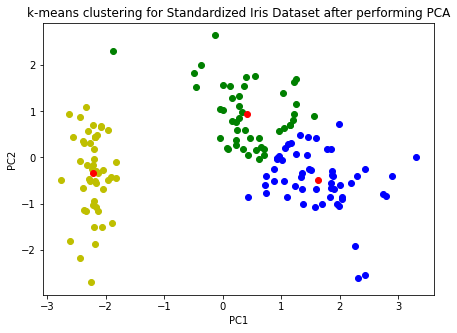

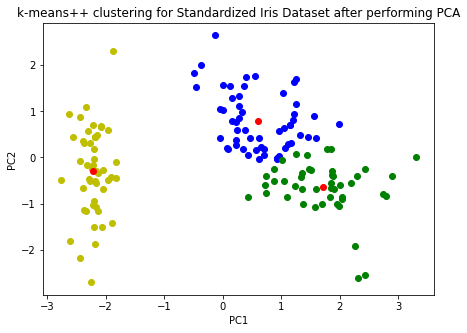

113.12338455405968 	 0.5911805629730225 	 112.52894972798143 	 0.6631426811218262
K means:1		K means ++ : 4


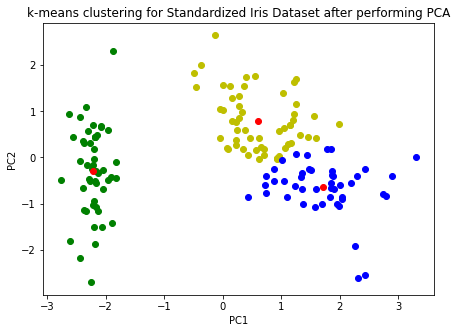

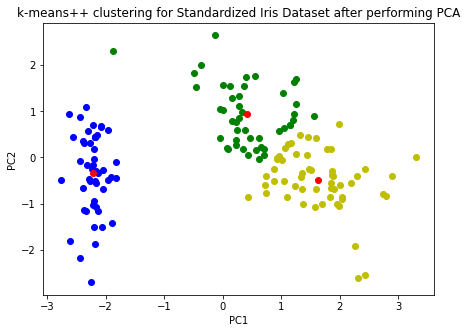

112.52894972798143 	 0.9427413940429688 	 113.12338455405968 	 0.7589895725250244
K means:9		K means ++ : 5


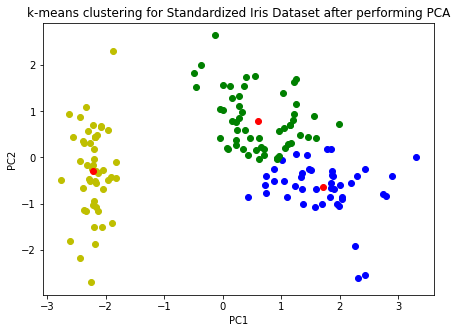

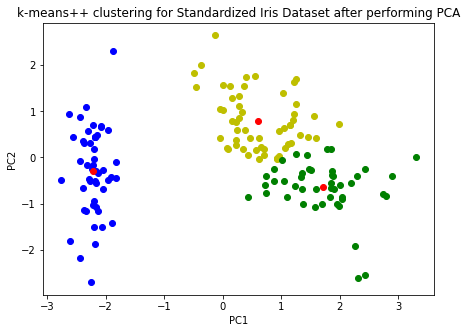

112.52894972798143 	 0.9746968746185303 	 112.52894972798143 	 0.9626824855804443
K means:7		K means ++ : 8


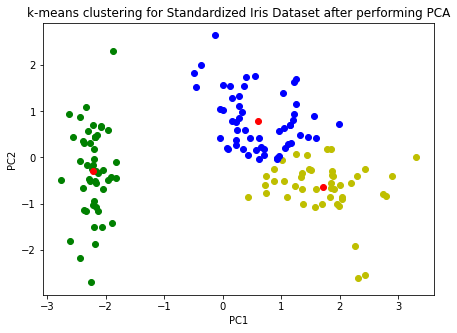

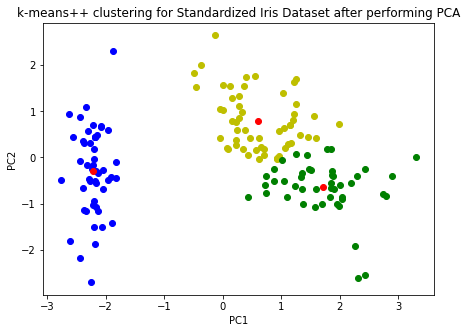

112.52894972798143 	 0.8588881492614746 	 112.52894972798143 	 1.2143712043762207
K means:8		K means ++ : 10


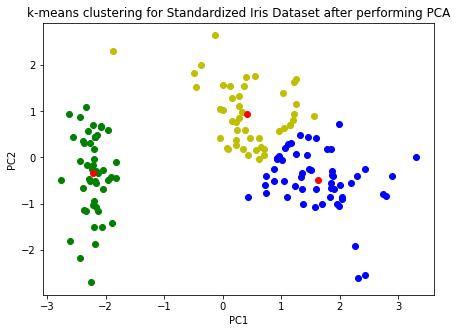

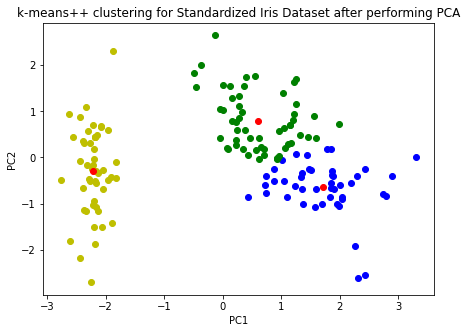

113.12338455405968 	 0.9787099361419678 	 112.52894972798143 	 1.230339527130127
K means:6		K means ++ : 10


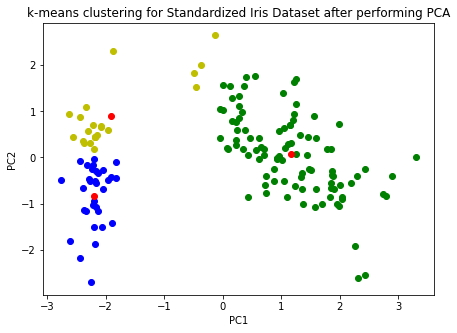

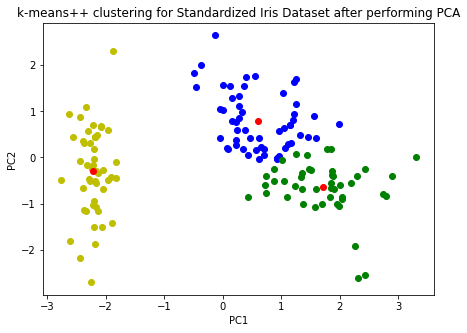

134.38057862152613 	 0.5672435760498047 	 112.52894972798143 	 1.0945394039154053
K means:4		K means ++ : 8


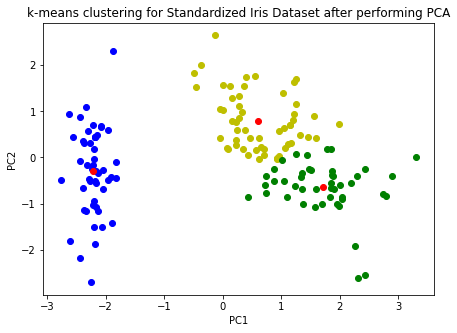

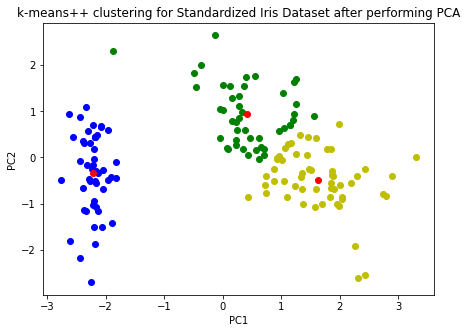

112.52894972798143 	 1.0945343971252441 	 113.12338455405968 	 0.6631393432617188
K means:10		K means ++ : 3


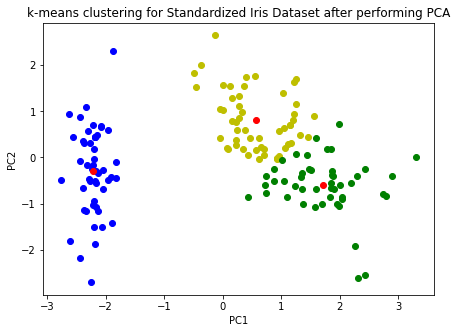

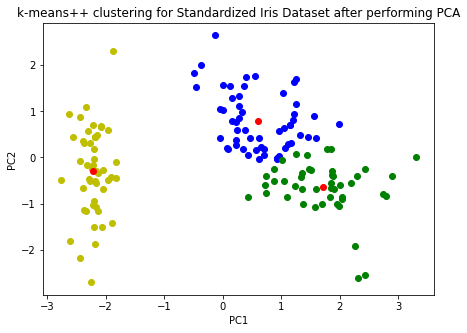

112.35689973760635 	 0.6870300769805908 	 112.52894972798143 	 0.8868165016174316
K means:4		K means ++ : 6


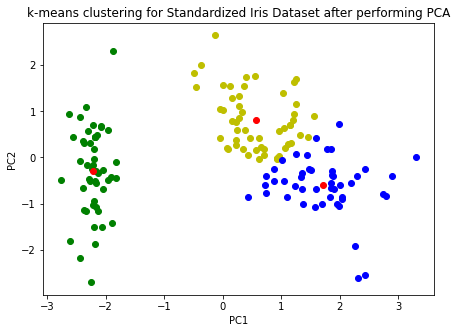

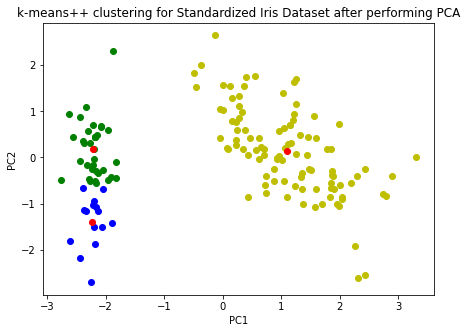

112.35689973760635 	 0.5193064212799072 	 132.5773429112728 	 0.587242841720581
K means:3		K means ++ : 1


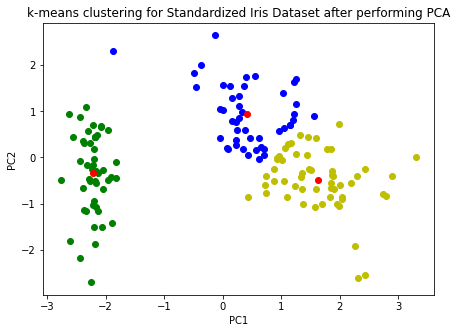

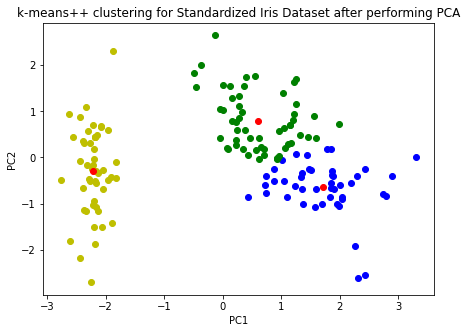

113.12338455405968 	 1.334193468093872 	 112.52894972798143 	 0.6631395816802979
K means:9		K means ++ : 5


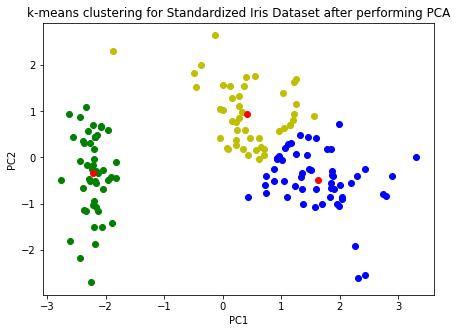

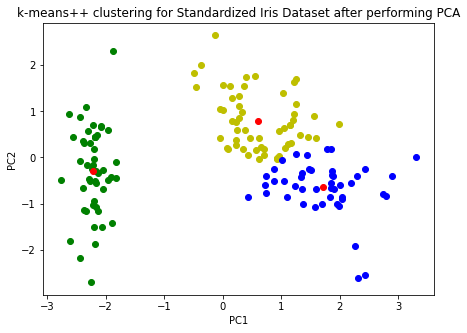

113.12338455405968 	 0.527296781539917 	 112.52894972798143 	 1.0785284042358398
K means:2		K means ++ : 7


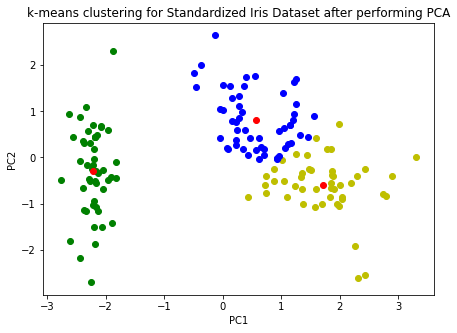

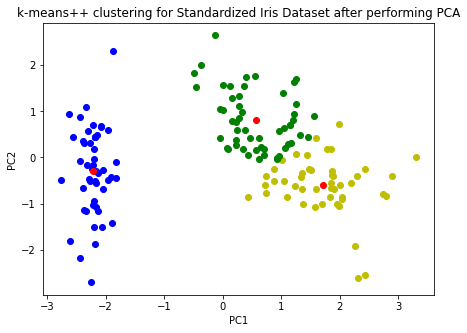

112.35689973760635 	 0.5632479190826416 	 112.35689973760635 	 1.1305198669433594
K means:2		K means ++ : 6


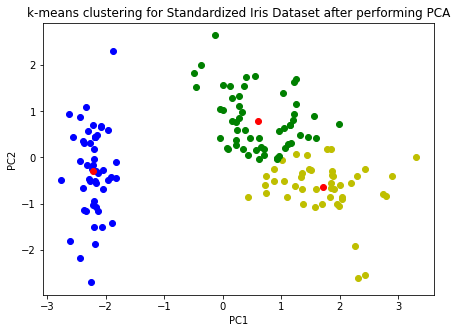

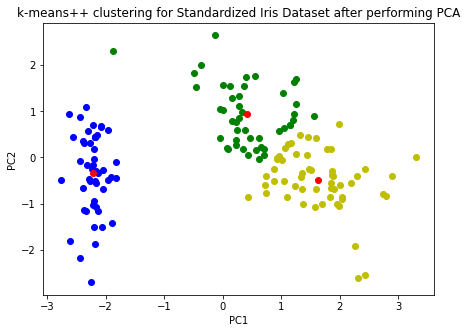

112.52894972798143 	 0.731022834777832 	 113.12338455405968 	 0.770970344543457
K means:7		K means ++ : 6


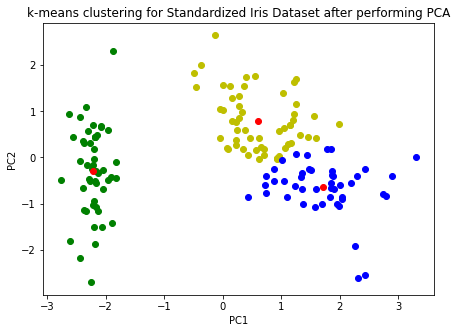

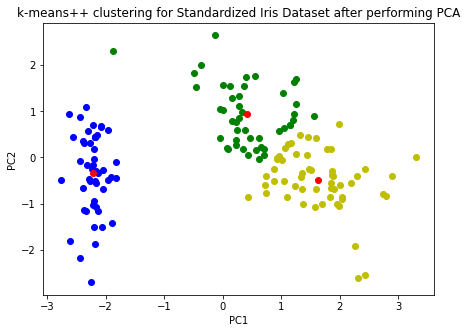

112.52894972798143 	 1.0466079711914062 	 113.12338455405968 	 1.3381786346435547
K means:7		K means ++ : 5


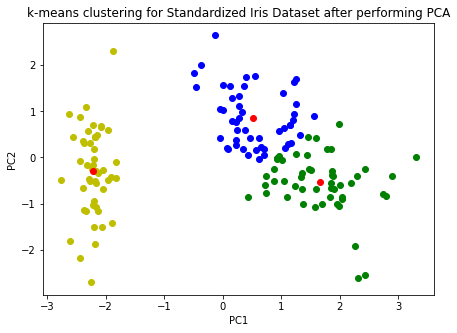

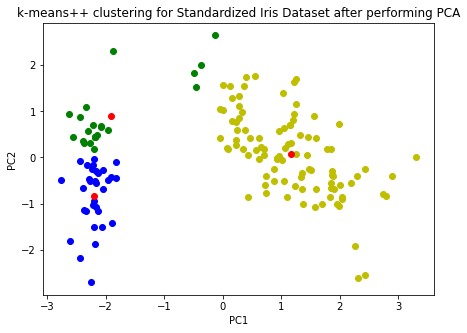

112.6098764524865 	 0.5712621212005615 	 134.38057862152613 	 0.5872170925140381
K means:4		K means ++ : 4


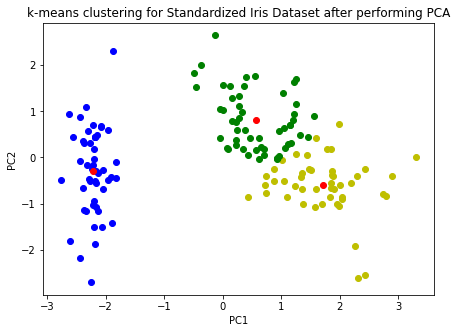

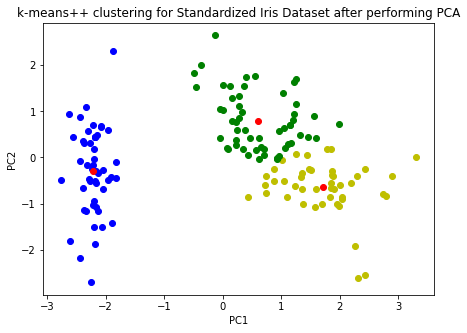

112.35689973760635 	 0.4833528995513916 	 112.52894972798143 	 1.3102829456329346
K means:2		K means ++ : 8


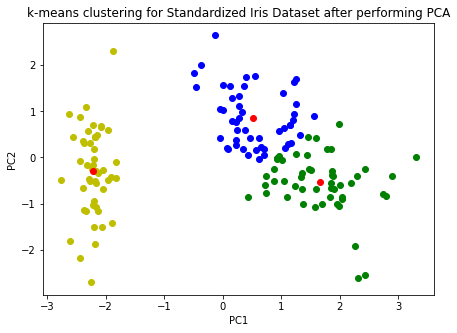

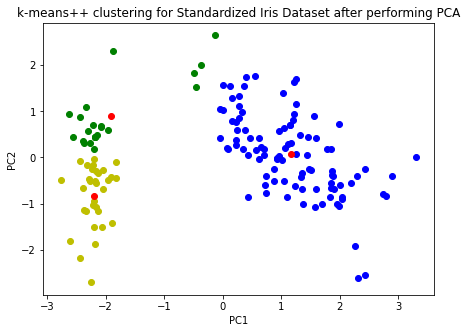

112.6098764524865 	 0.8668131828308105 	 134.38057862152613 	 0.7909386157989502
K means:6		K means ++ : 6


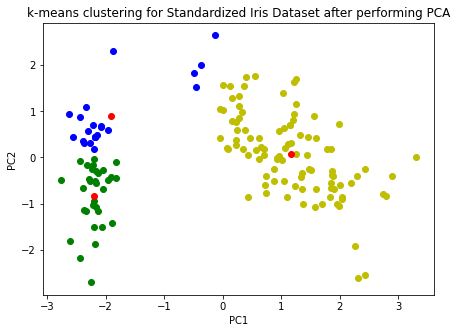

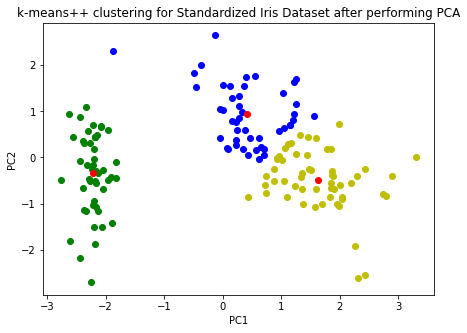

134.38057862152613 	 0.5512642860412598 	 113.12338455405968 	 0.5912108421325684
K means:1		K means ++ : 4


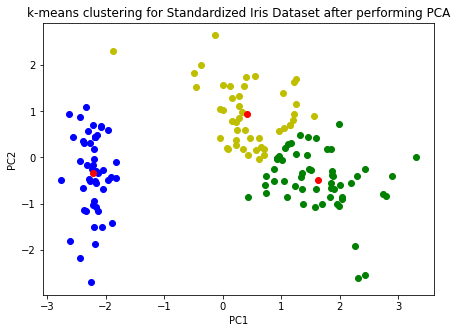

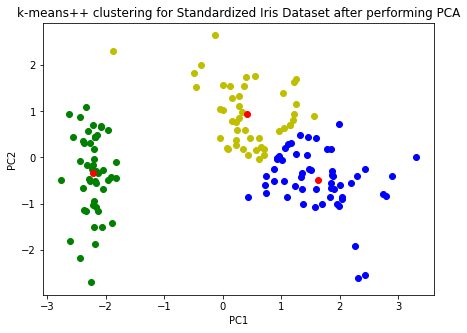

113.12338455405968 	 0.6591191291809082 	 113.12338455405968 	 1.28228759765625
K means:7		K means ++ : 6


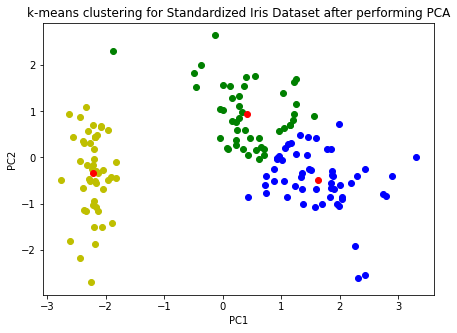

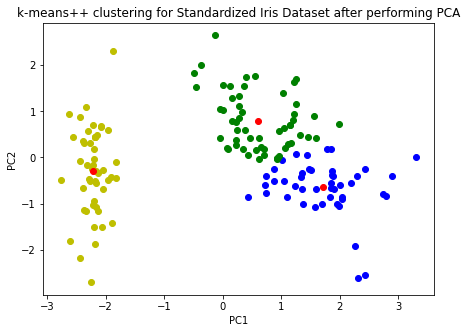

113.12338455405968 	 0.7949380874633789 	 112.52894972798143 	 1.5339241027832031
K means:8		K means ++ : 8


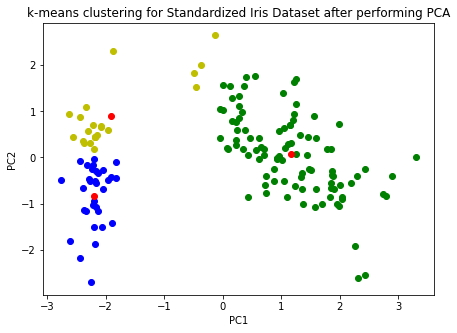

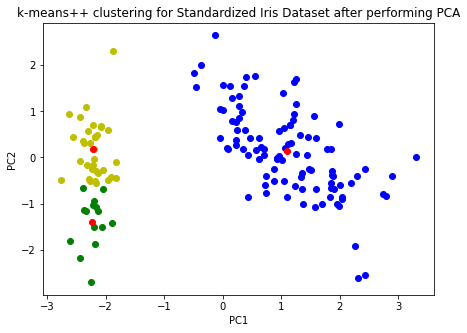

134.38057862152613 	 0.475391149520874 	 132.5773429112728 	 0.531318187713623
K means:2		K means ++ : 2


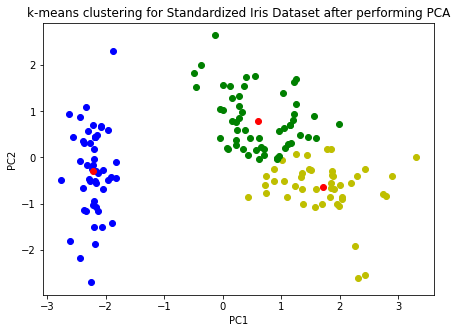

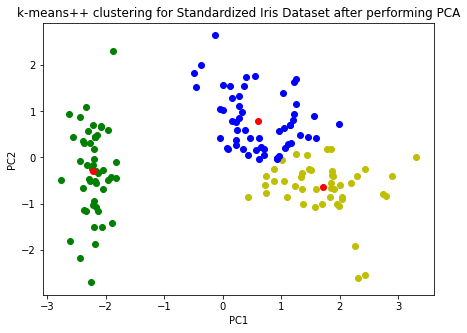

112.52894972798143 	 1.5499076843261719 	 112.52894972798143 	 1.3541984558105469
K means:9		K means ++ : 8


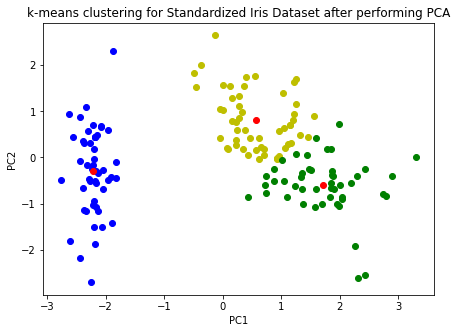

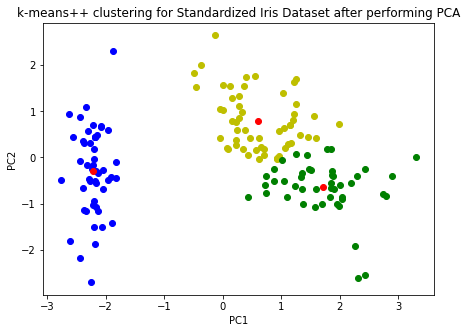

112.35689973760635 	 0.683074951171875 	 112.52894972798143 	 0.6471347808837891
K means:3		K means ++ : 5


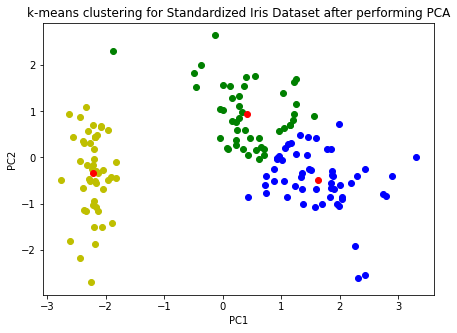

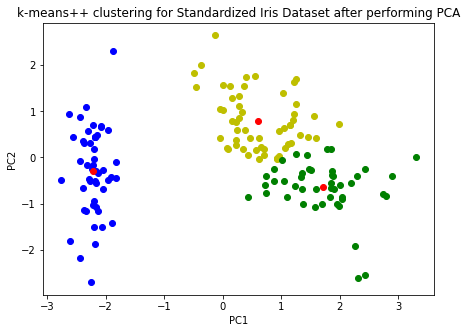

113.12338455405968 	 1.5778677463531494 	 112.52894972798143 	 1.094536542892456
K means:8		K means ++ : 8


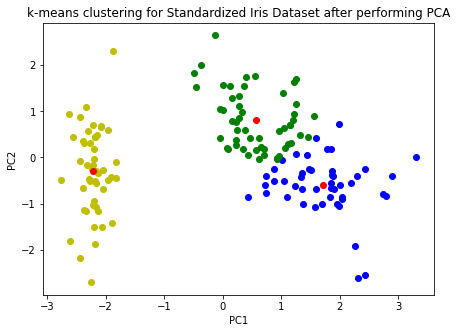

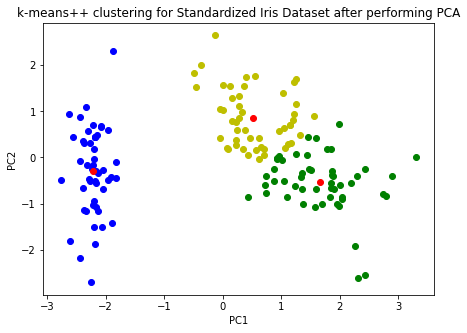

112.35689973760635 	 0.6910920143127441 	 112.6098764524865 	 0.898827314376831
K means:6		K means ++ : 4


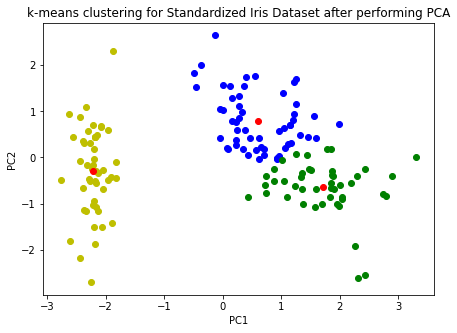

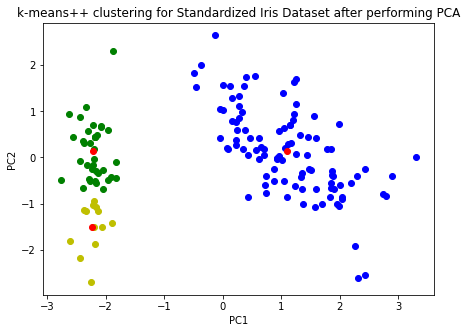

112.52894972798143 	 1.4061474800109863 	 132.9321470284424 	 1.1504313945770264
K means:10		K means ++ : 3


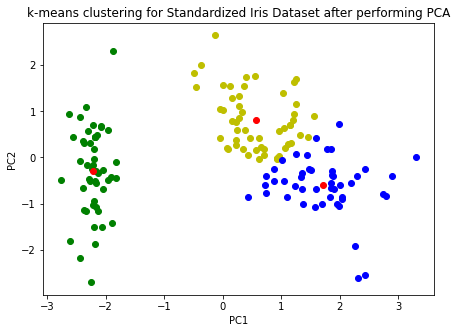

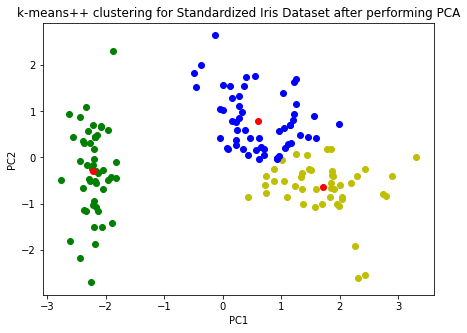

112.35689973760635 	 0.9347782135009766 	 112.52894972798143 	 0.7190511226654053
K means:7		K means ++ : 1


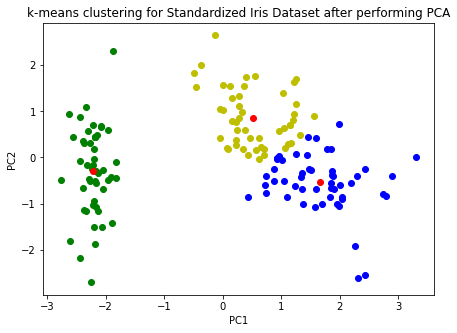

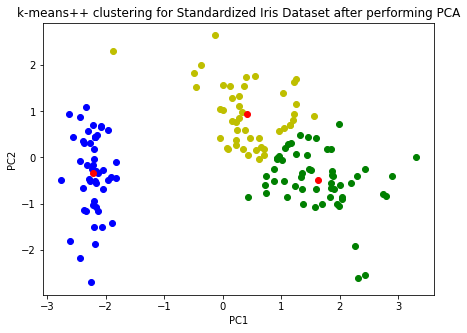

112.6098764524865 	 0.655113935470581 	 113.12338455405968 	 0.6910765171051025
K means:3		K means ++ : 5


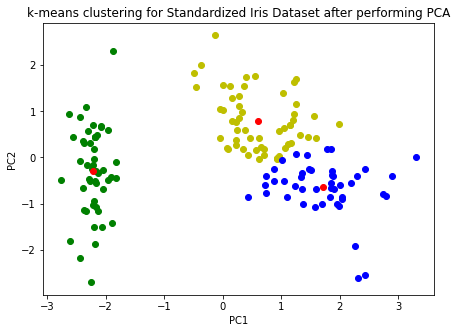

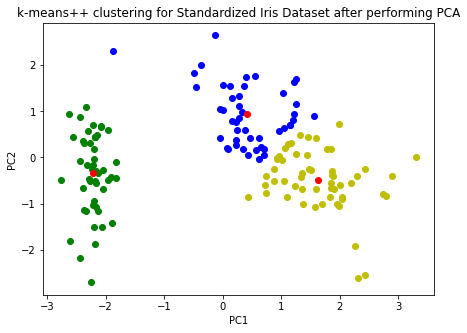

112.52894972798143 	 0.9387187957763672 	 113.12338455405968 	 0.611210823059082
K means:10		K means ++ : 4


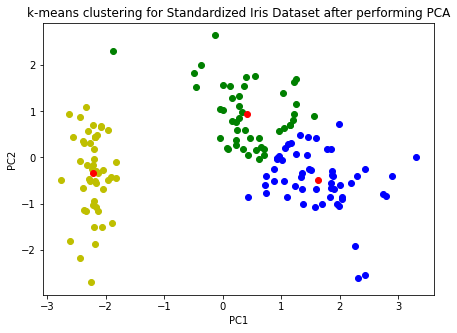

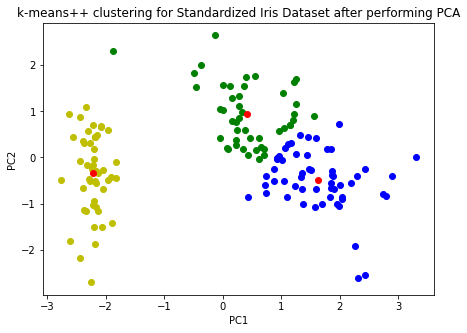

113.12338455405968 	 0.8828203678131104 	 113.12338455405968 	 0.6631157398223877
K means:9		K means ++ : 3


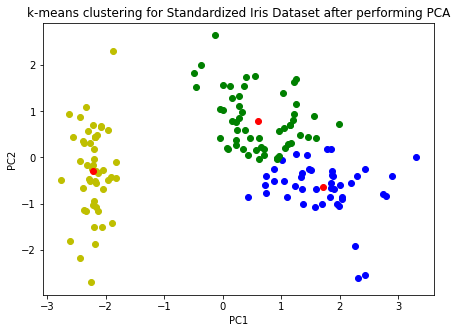

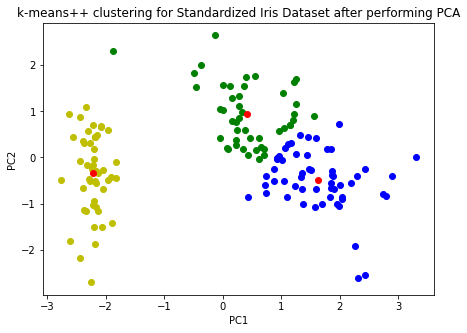

112.52894972798143 	 0.6191740036010742 	 113.12338455405968 	 0.7110483646392822
K means:5		K means ++ : 6


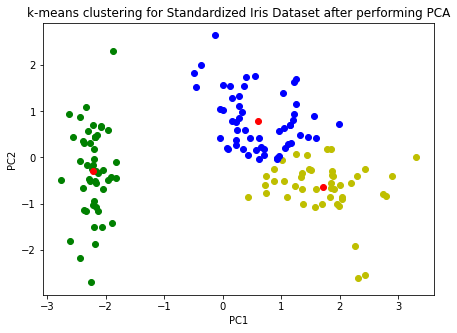

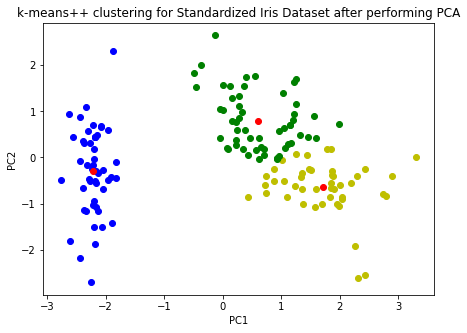

112.52894972798143 	 1.1584560871124268 	 112.52894972798143 	 1.0066511631011963
K means:8		K means ++ : 6


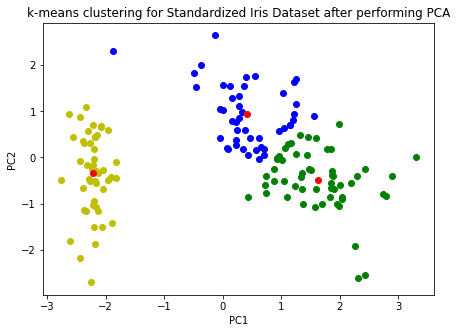

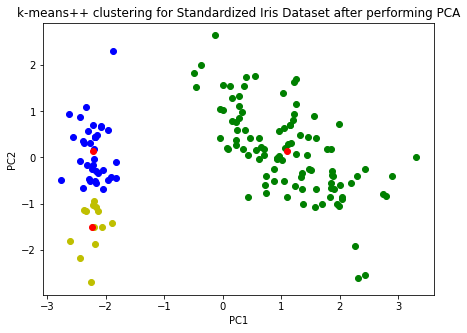

113.12338455405968 	 0.6830871105194092 	 132.9321470284424 	 0.49933385848999023
K means:5		K means ++ : 2


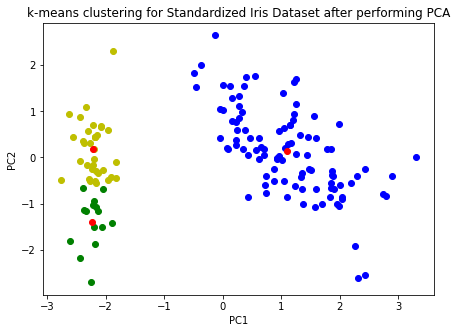

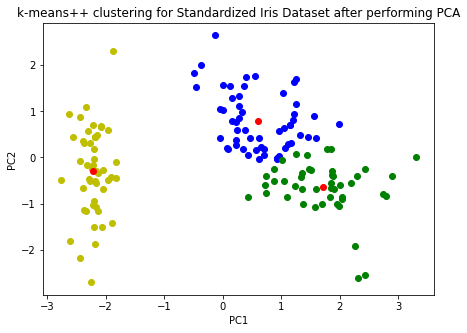

132.5773429112728 	 0.47933149337768555 	 112.52894972798143 	 1.1784281730651855
K means:1		K means ++ : 7


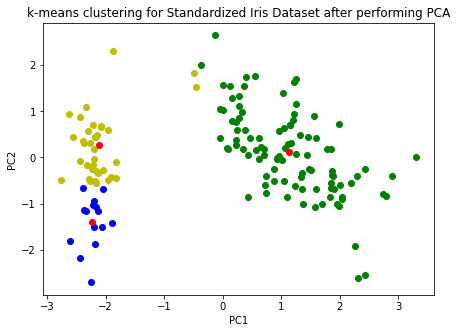

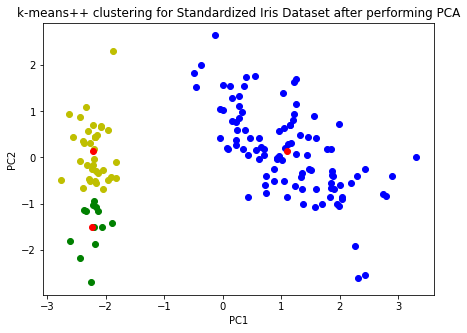

133.22453996764477 	 0.790942907333374 	 132.9321470284424 	 1.0186398029327393
K means:1		K means ++ : 2


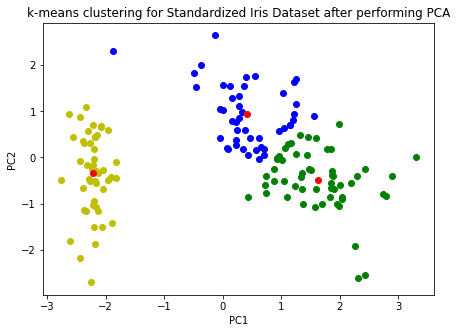

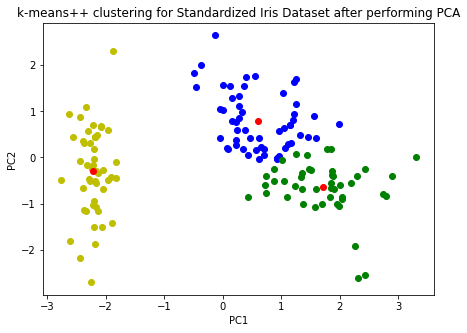

113.12338455405968 	 0.7270472049713135 	 112.52894972798143 	 0.7949111461639404
K means:5		K means ++ : 7


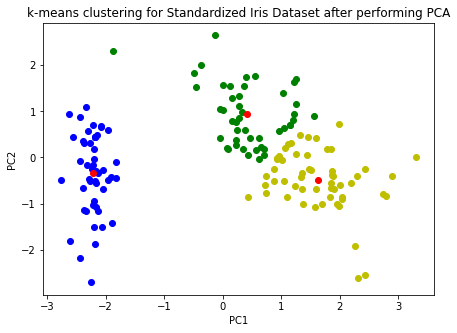

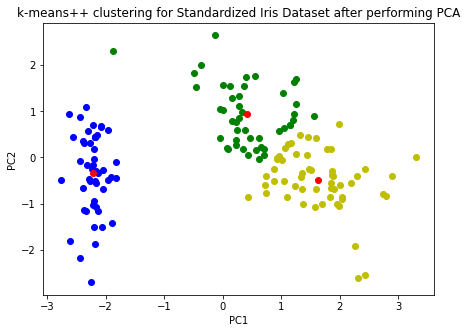

113.12338455405968 	 0.7350180149078369 	 113.12338455405968 	 0.5592801570892334
K means:8		K means ++ : 2


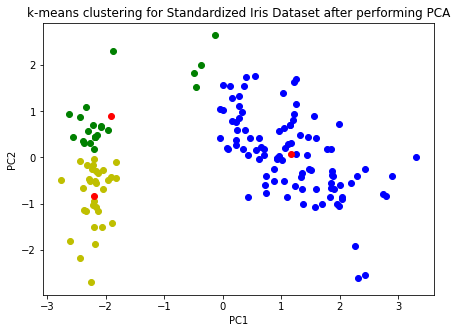

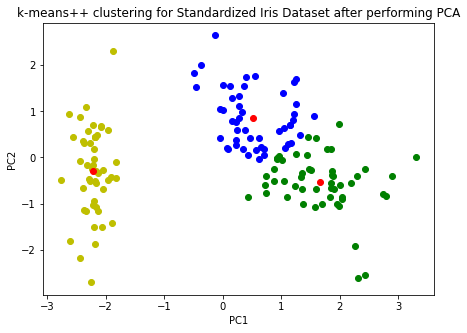

134.38057862152613 	 0.7829253673553467 	 112.6098764524865 	 0.5872445106506348
K means:3		K means ++ : 3


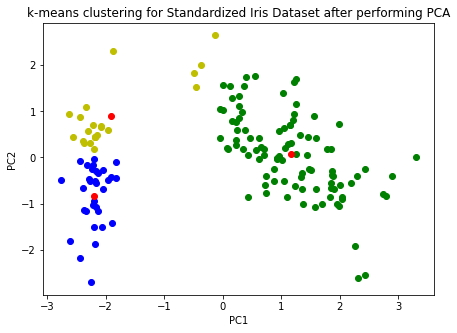

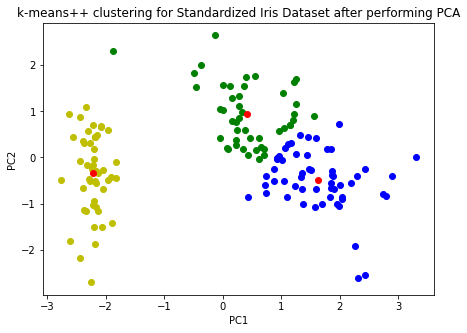

134.38057862152613 	 0.67510986328125 	 113.12338455405968 	 0.6591079235076904
K means:6		K means ++ : 4


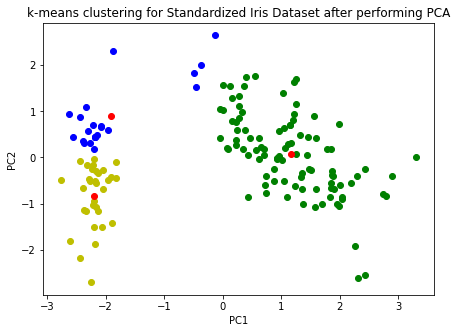

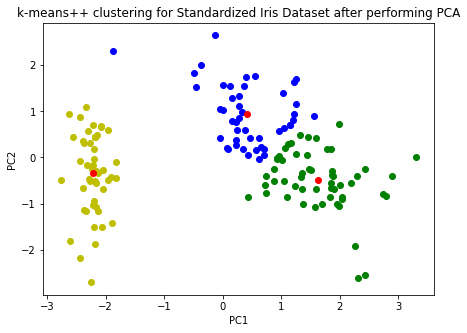

134.38057862152613 	 0.4913148880004883 	 113.12338455405968 	 0.7510249614715576
K means:3		K means ++ : 2


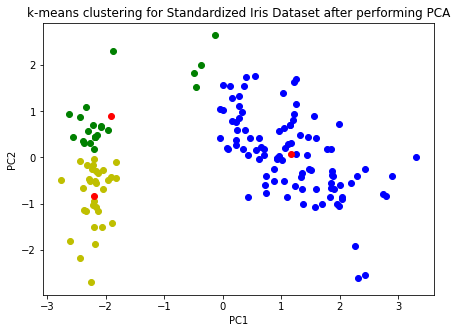

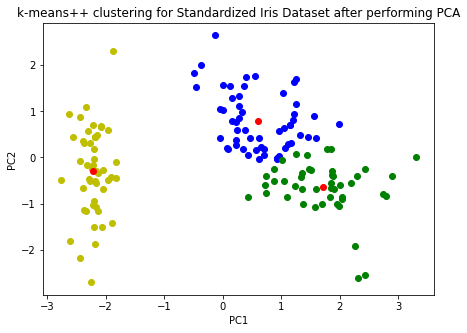

134.38057862152613 	 0.7549641132354736 	 112.52894972798143 	 0.8149425983428955
K means:7		K means ++ : 6


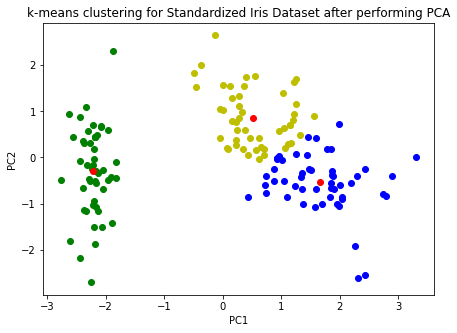

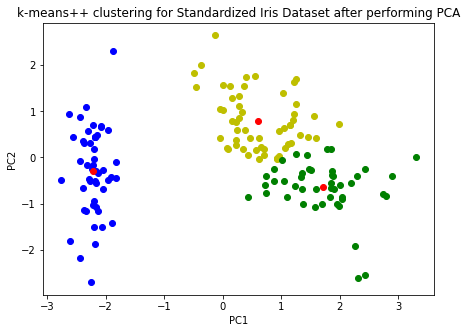

112.6098764524865 	 0.5912156105041504 	 112.52894972798143 	 1.2503221035003662
K means:4		K means ++ : 8


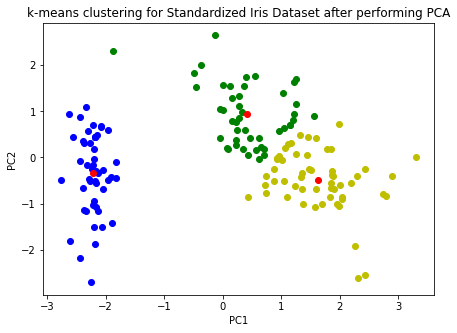

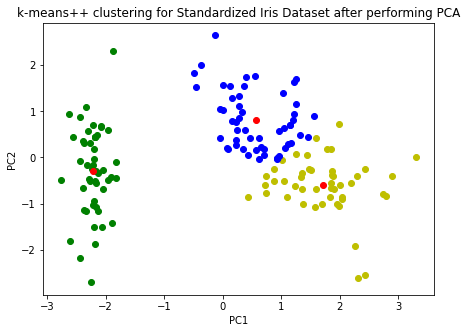

113.12338455405968 	 1.054570198059082 	 112.35689973760635 	 0.8588452339172363
K means:8		K means ++ : 3


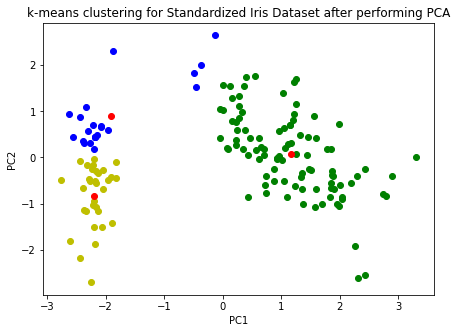

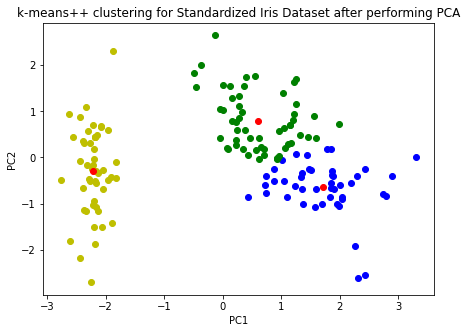

134.38057862152613 	 0.50335693359375 	 112.52894972798143 	 0.978691577911377
K means:3		K means ++ : 8


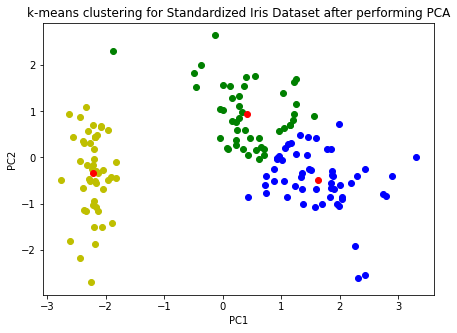

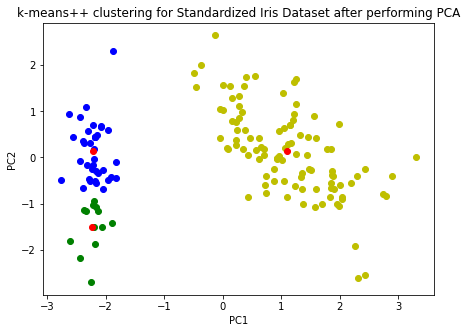

113.12338455405968 	 0.6830599308013916 	 132.9321470284424 	 0.4274563789367676
K means:6		K means ++ : 1


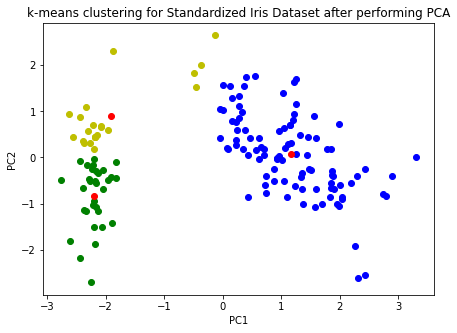

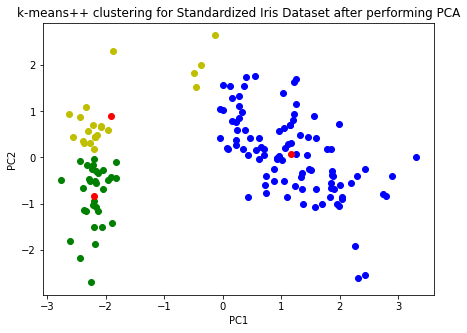

134.38057862152613 	 0.8428456783294678 	 134.38057862152613 	 0.5952334403991699
K means:5		K means ++ : 2


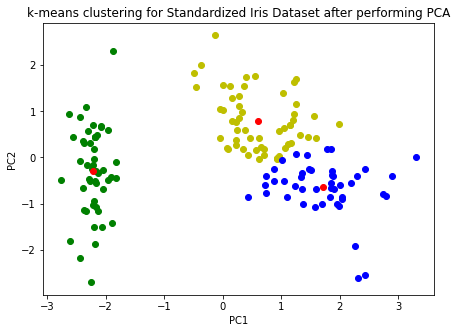

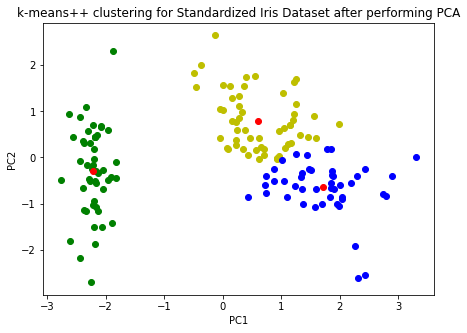

112.52894972798143 	 0.9547250270843506 	 112.52894972798143 	 0.8948042392730713
K means:7		K means ++ : 8


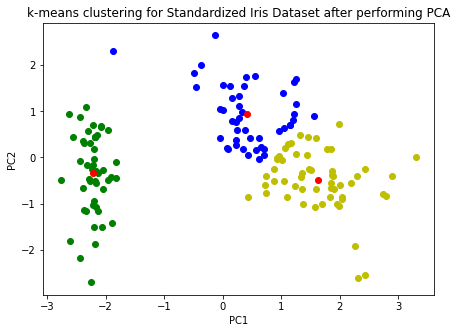

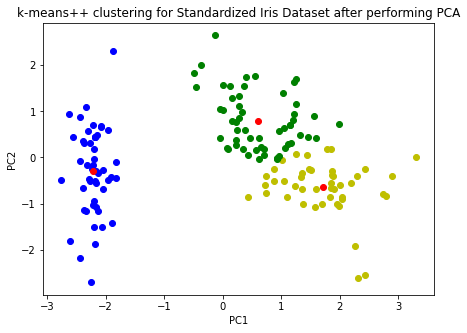

113.12338455405968 	 0.8029286861419678 	 112.52894972798143 	 1.2622871398925781
K means:8		K means ++ : 9


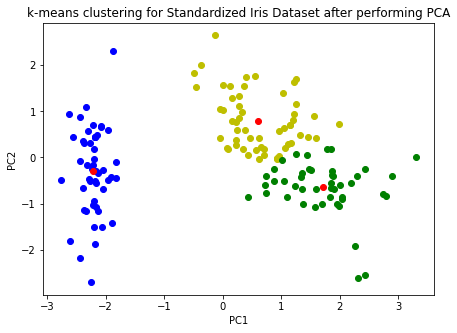

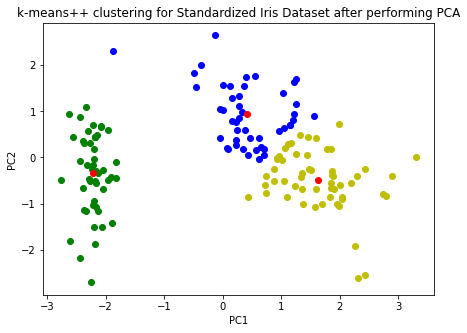

112.52894972798143 	 0.7949645519256592 	 113.12338455405968 	 0.8588261604309082
K means:6		K means ++ : 7


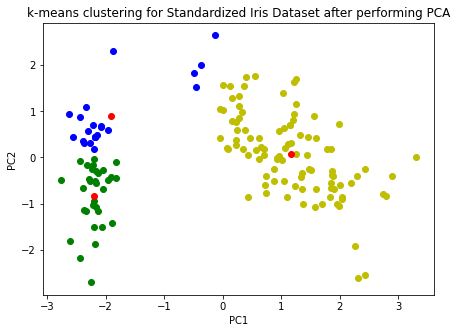

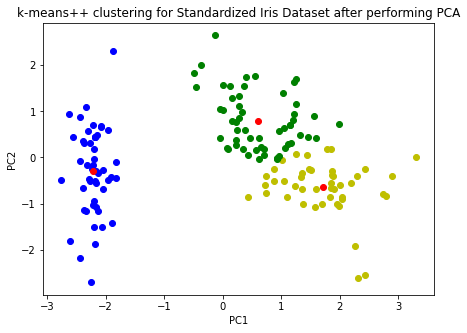

134.38057862152613 	 0.7670176029205322 	 112.52894972798143 	 0.8468279838562012
K means:6		K means ++ : 5


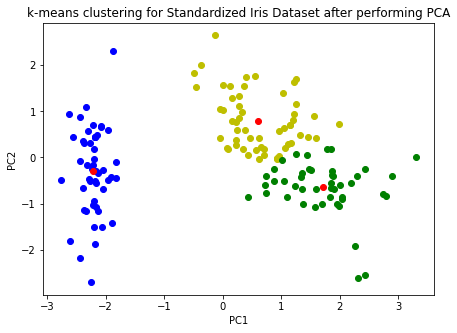

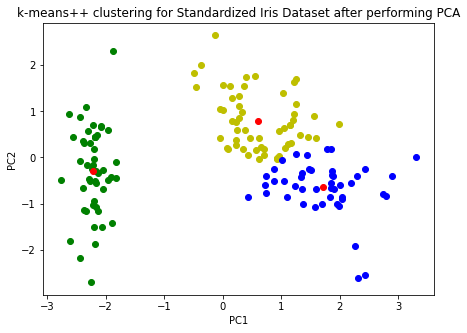

112.52894972798143 	 0.7430415153503418 	 112.52894972798143 	 0.6830832958221436
K means:5		K means ++ : 6


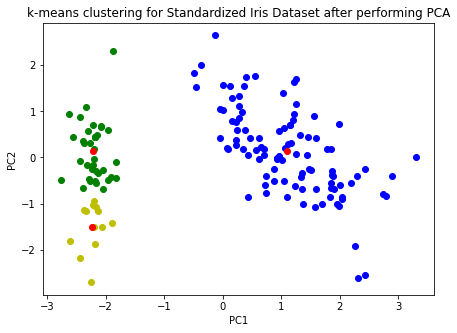

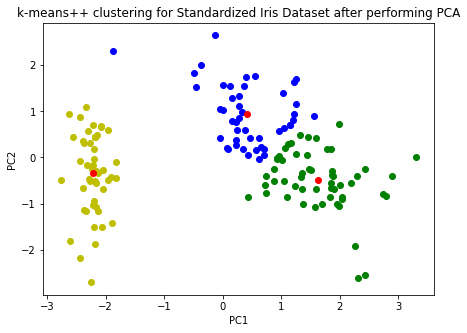

132.9321470284424 	 0.49530458450317383 	 113.12338455405968 	 0.8708646297454834
K means:2		K means ++ : 6


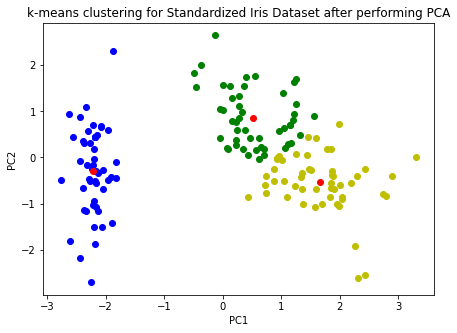

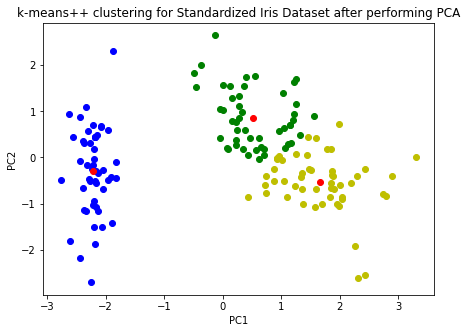

112.6098764524865 	 0.774940013885498 	 112.6098764524865 	 0.7310490608215332
K means:4		K means ++ : 4


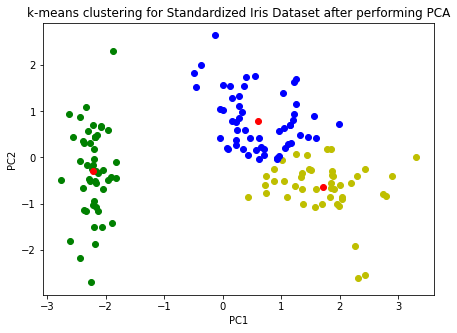

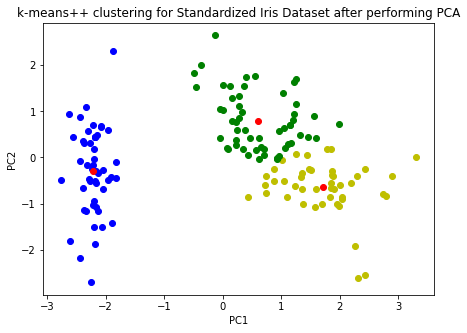

112.52894972798143 	 0.882821798324585 	 112.52894972798143 	 1.126469373703003
K means:8		K means ++ : 8


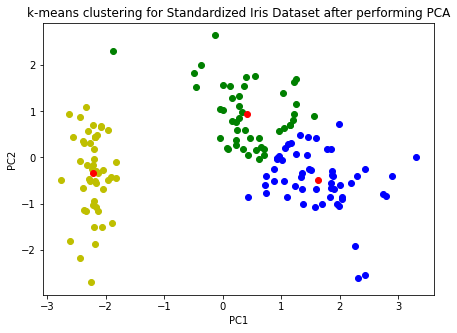

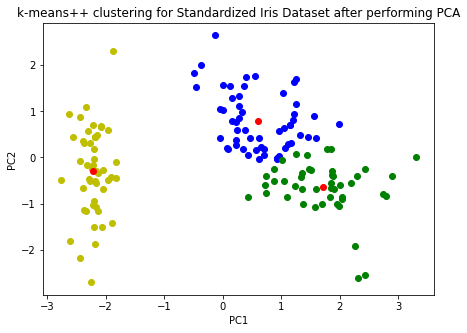

113.12338455405968 	 0.9187972545623779 	 112.52894972798143 	 0.5872156620025635
K means:6		K means ++ : 3


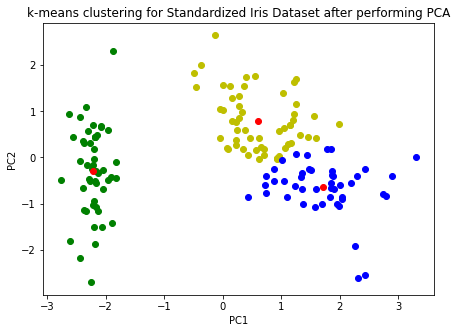

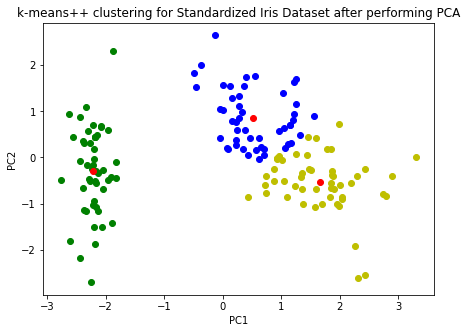

112.52894972798143 	 0.9746983051300049 	 112.6098764524865 	 0.6950709819793701
K means:10		K means ++ : 5


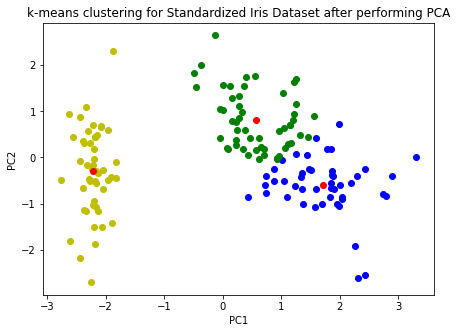

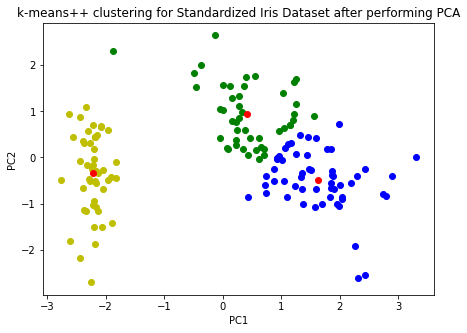

112.35689973760635 	 0.7470035552978516 	 113.12338455405968 	 1.242311716079712
K means:5		K means ++ : 7


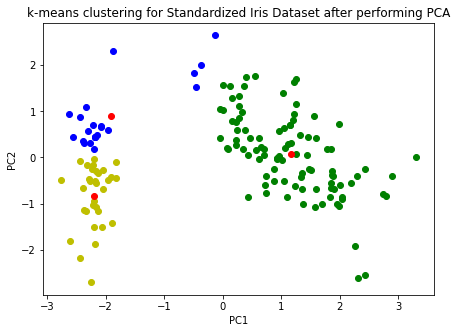

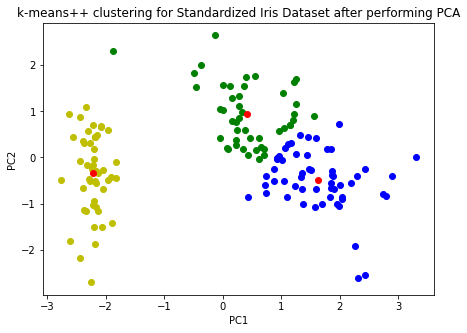

134.38057862152613 	 0.7070834636688232 	 113.12338455405968 	 0.6711034774780273
K means:4		K means ++ : 5


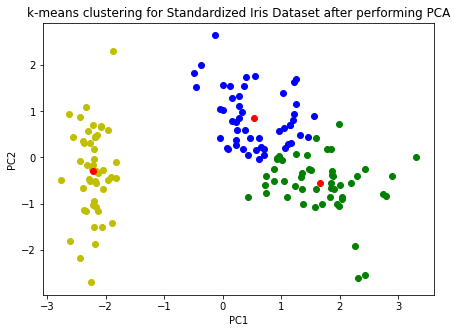

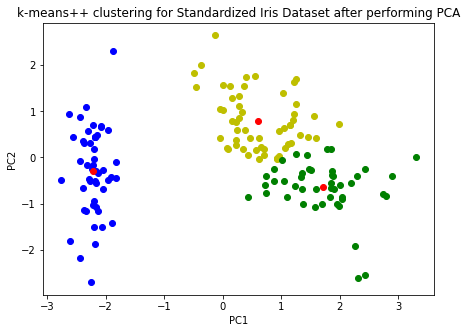

112.63257933814148 	 0.7230522632598877 	 112.52894972798143 	 1.3941113948822021
K means:7		K means ++ : 7


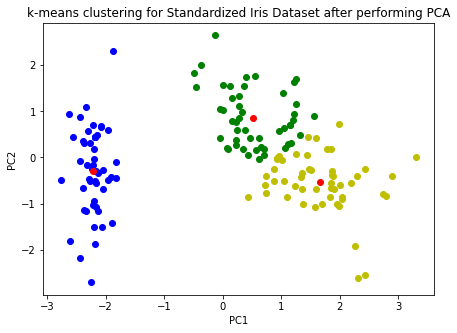

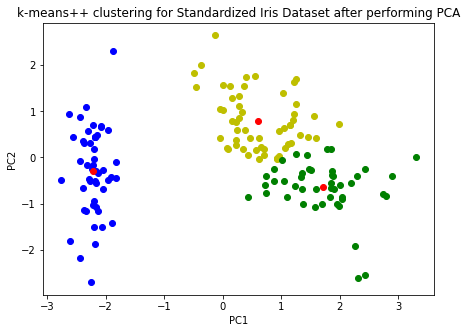

112.6098764524865 	 0.675126314163208 	 112.52894972798143 	 0.8948030471801758
K means:5		K means ++ : 8


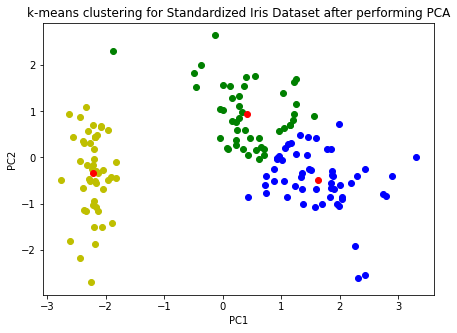

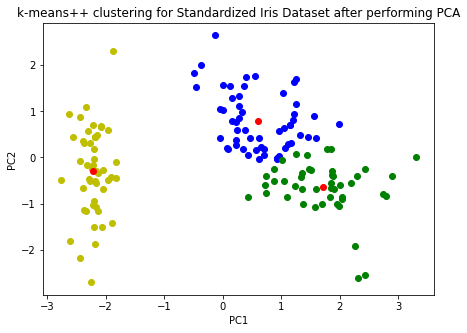

113.12338455405968 	 0.8229007720947266 	 112.52894972798143 	 0.8987736701965332
K means:5		K means ++ : 8


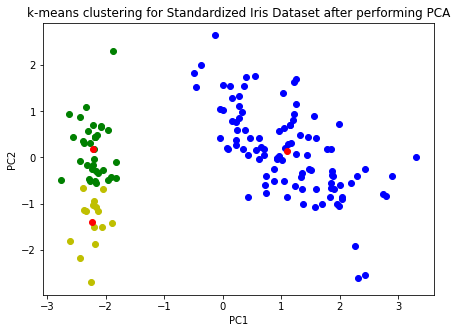

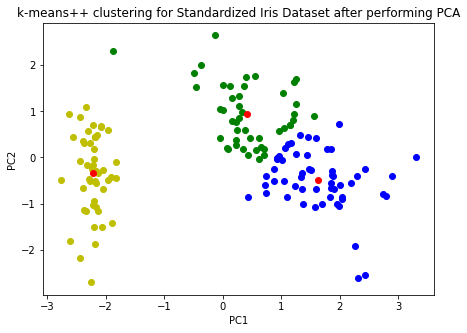

132.5773429112728 	 0.5792524814605713 	 113.12338455405968 	 0.850862979888916
K means:4		K means ++ : 5


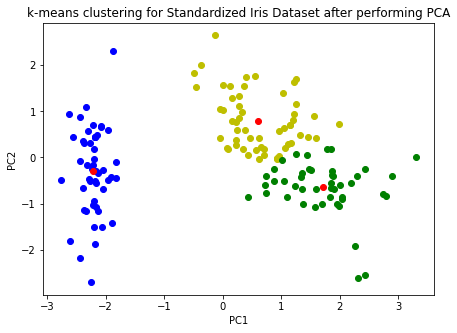

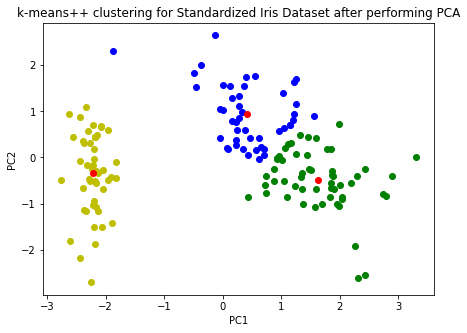

112.52894972798143 	 1.6537933349609375 	 113.12338455405968 	 0.5352835655212402
K means:14		K means ++ : 1


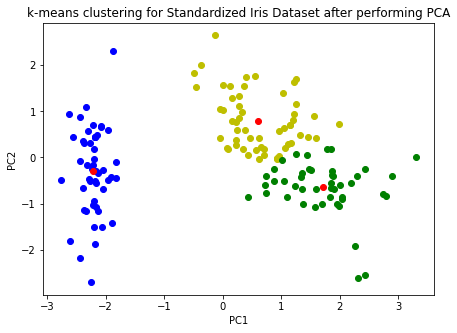

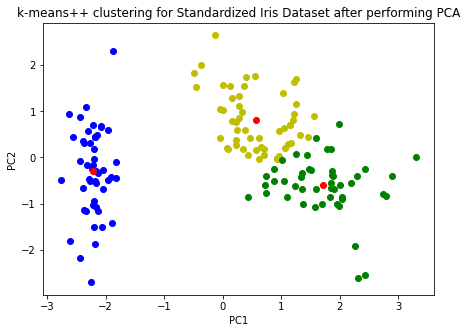

112.52894972798143 	 0.882819652557373 	 112.35689973760635 	 1.134458065032959
K means:8		K means ++ : 5


In [842]:
cost_kmeans = []
cost_Dsq = []
t1, t2 = [], []
Noiter_kmeans, Noiter_Dsq = [], []
k = 3

for i in range(100):
    start_time = time.time()
    cent = data3_.sample()
    cent1 = cent.append(data3_.sample(k-1))
    plot1 = plt.figure(figsize=(7,5))
    a, b, plot1 = k_means_plot(data3_,cent1, k, plot1)
    Noiter_kmeans.append(b)
    cost_kmeans.append(a)
    t1.append(time.time() - start_time)
    start_time2 = time.time()
    cent2 = Dsq_init(data3_, 3,cent)
    plot2 = plt.figure(figsize=(7,5))
    e, f, plot2  = k_means_Dsq_plot(data3_,cent2, k, plot2)
    Noiter_Dsq.append(f)
    cost_Dsq.append(e)
    t2.append(time.time() - start_time2)
    print(cost_kmeans[i], "\t", t1[i],"\t", cost_Dsq[i], "\t", t2[i])
    print("K means:{0}\t\tK means ++ : {1}".format(b, f))

In [843]:
k_meansAvg, DsqAvg, k_meansMin, DsqMin, k_meansAvgI, DsqAvgI = [], [], [], [], [], []
k_meansAvgT, DsqAvgT = [], []
k = 3
k_meansAvg.append(np.mean(cost_kmeans))
k_meansAvgT.append(np.mean(t1))
DsqAvg.append(np.mean(cost_Dsq))
DsqAvgT.append(np.mean(t2)) 
k_meansAvgI.append(np.mean(Noiter_kmeans))
DsqAvgI.append(np.mean(Noiter_Dsq))
k_meansMin.append(np.min(cost_kmeans)) 
DsqMin.append(np.min(cost_Dsq))


In [844]:
Results = pd.DataFrame()
Results["k_meansAvg"] = k_meansAvg
Results["k_means ++ Avg"] = DsqAvg
Results["k_means Min"] = k_meansMin
Results["k_means ++ Min"] = DsqMin
Results["k_meansAvgT"] = k_meansAvgT 
Results["k_means++AvgT"] = DsqAvgT
Results["k_meansAvgI"] = k_meansAvgI
Results["k_means++AvgI"] = DsqAvgI
Results

,k_meansAvg,k_means ++ Avg,k_means Min,k_means ++ Min,k_meansAvgT,k_means++AvgT,k_meansAvgI,k_means++AvgI
0,118.439176,116.468868,112.3569,112.3569,0.830332,0.930078,5.62,5.24
